<h1>Credit Card Fraud Detection<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-Dataset" data-toc-modified-id="About-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About Dataset</a></span></li><li><span><a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check missing values</a></span></li><li><span><a href="#Check-how-x-distributes" data-toc-modified-id="Check-how-x-distributes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check how x distributes</a></span></li><li><span><a href="#Check-how-y-distributes" data-toc-modified-id="Check-how-y-distributes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check how y distributes</a></span></li><li><span><a href="#Check-linear-independency-of-values" data-toc-modified-id="Check-linear-independency-of-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check linear independency of values</a></span></li><li><span><a href="#Check-nonlinear-independency" data-toc-modified-id="Check-nonlinear-independency-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Check nonlinear independency</a></span></li><li><span><a href="#How-distribution-differs-upon-normal/abnormal-transcation" data-toc-modified-id="How-distribution-differs-upon-normal/abnormal-transcation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>How distribution differs upon normal/abnormal transcation</a></span></li><li><span><a href="#How-linear-dependency-differs-upton-normal/abnormal" data-toc-modified-id="How-linear-dependency-differs-upton-normal/abnormal-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>How linear dependency differs upton normal/abnormal</a></span></li><li><span><a href="#How-nonlinear-dependency-differs-upton-normal/abnormal" data-toc-modified-id="How-nonlinear-dependency-differs-upton-normal/abnormal-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>How nonlinear dependency differs upton normal/abnormal</a></span></li><li><span><a href="#Strong-nonlinear-dependency-betwwen-Class,-Amount,-Time_diff" data-toc-modified-id="Strong-nonlinear-dependency-betwwen-Class,-Amount,-Time_diff-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Strong nonlinear dependency betwwen Class, Amount, Time_diff</a></span></li></ul></div>

# About Dataset
- From [Kaggle (Credit Card Fraud Detection)](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- Highly unbalanced data (492 frauds out of 284,807 transactions)
- **Input variables**
    - 28 numerical input variables which are the result of a PCA transformation
    - 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
    - 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning
- **Target Variable**
    - 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns

from sklearn.metrics import normalized_mutual_info_score

In [5]:
# file located at '/data' in parent directory
path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'creditcard.csv')) 
df = pd.read_csv(path)

In [6]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
df['Time_diff_from_previous'] = df['Time'].diff()
df['Time_diff_from_previous'].iloc[0] = 0
df['Time_diff_from_last'] = df['Time'].diff().iloc[1:].reset_index(drop=True)
df['Time_diff_from_last'].iloc[-1] = 0
display(df.head())
display(df.tail())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9         ...                V23       V24       V25  \
0  0.098698  0.363787         ...          -0.110474  0.066928  0.128539   
1  0.085102 -0.255425         ...           0.101288 -0.339846  0.167170   
2  0.247676 -1.514654         ...           0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024         ...          -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739         ...          -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  Time_diff_from_previous  \
0 -0.189115  0.133558 -0.021053  149.62      0                      0.0   
1  0.125895 -0.008983  0.014724    2.69      0                      0.0   
2 -0.139097 -0.055353 -0.059752  378.66      0                      1.0   
3 -0.221929  0.062723  0.061458  123.50      0                      0.0   
4  0.502292  0.219422  0.215153   69.99      0                      1.0   

   Time_diff_from_last  
0                  0.0  
1                  1.0  
2                  0.0  
3                  1.0  
4                  0.0  

[5 rows x 33 columns]

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9         ...                V23  \
284802 -2.606837 -4.918215  7.305334  1.914428         ...           1.014480   
284803  1.058415  0.024330  0.294869  0.584800         ...           0.012463   
284804  3.031260 -0.296827  0.708417  0.432454         ...          -0.037501   
284805  0.623708 -0.686180  0.679145  0.392087         ...          -0.163298   
284806 -0.649617  1.577006 -0.414650  0.486180         ...           0.376777   

             V24       V25       V26       V27       V28  Amount  Class  \
284802 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77      0   
284803 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79      0   
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0   
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0   
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0   

        Time_diff_from_previous  Time_diff_from_last  
284802                      1.0                  1.0  
284803                      1.0                  1.0  
284804                      1.0                  0.0  
284805                      0.0                  4.0  
284806                      4.0                  0.0  

[5 rows x 33 columns]

# Check missing values

In [6]:
df.isnull().any().sum()

0

# Check how x distributes

- Some of Vs are unimodal, some are not
- Some of Vs fluctuate together, they might share same linear components (as they're result of PCA)
- Time is cumulative sum of individual diffs, it should be decomposed
- Time diff has poor resolution, but as every transcation is a single event (if there's no evidence some of transactions are successive), there is no clue to smooth it

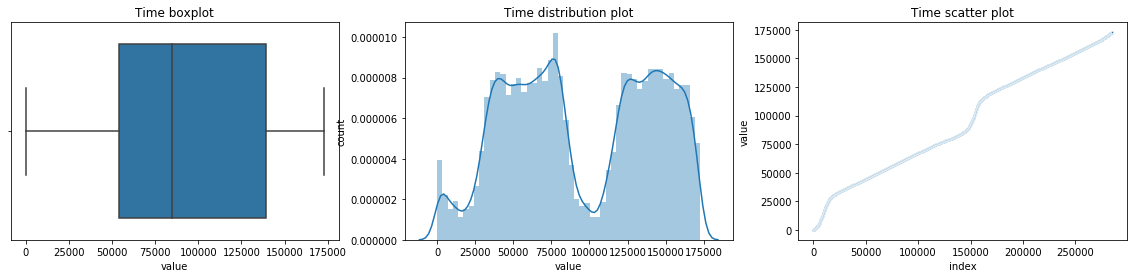

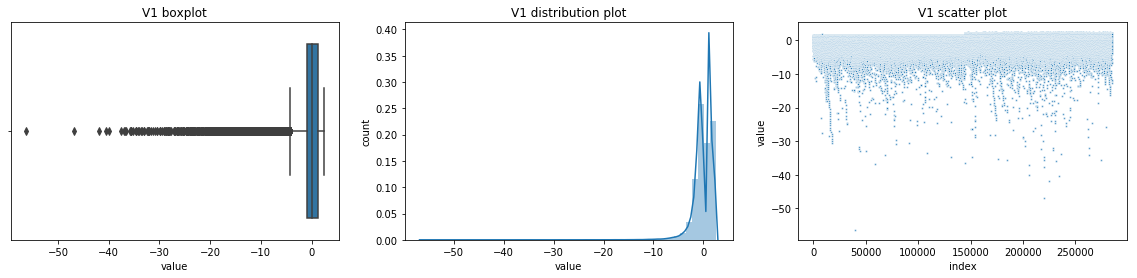

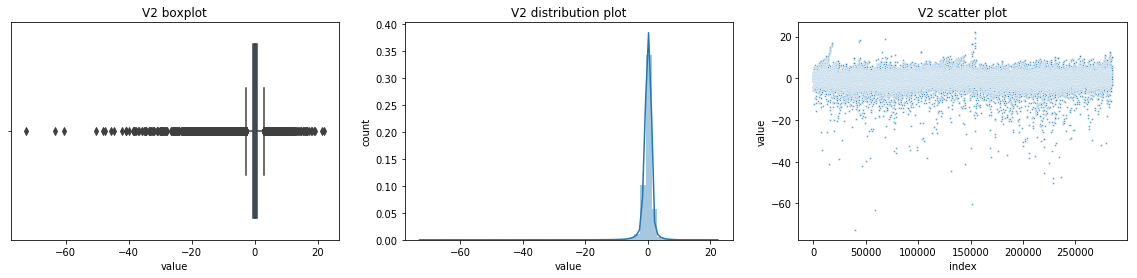

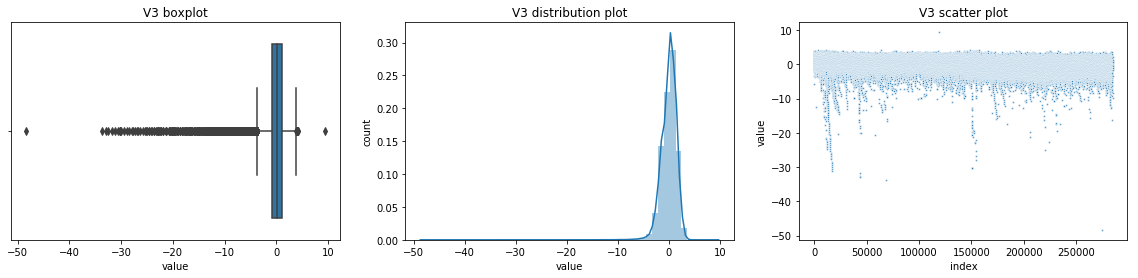

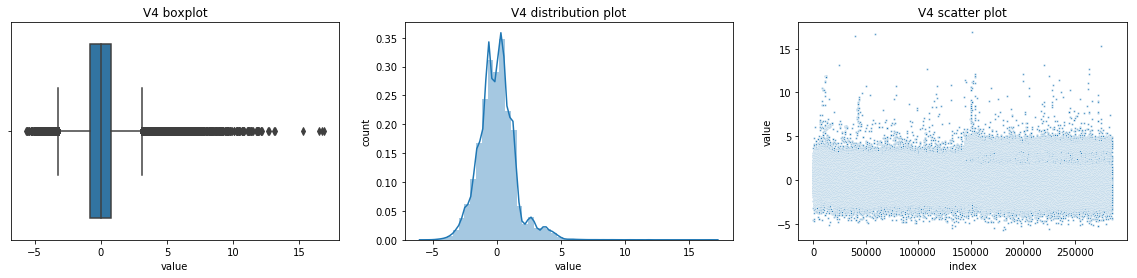

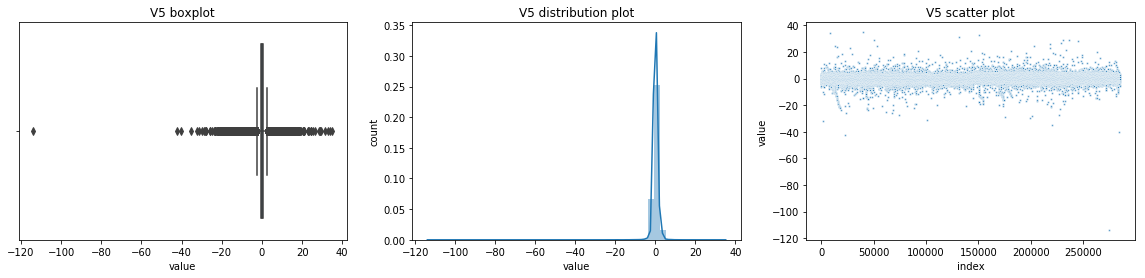

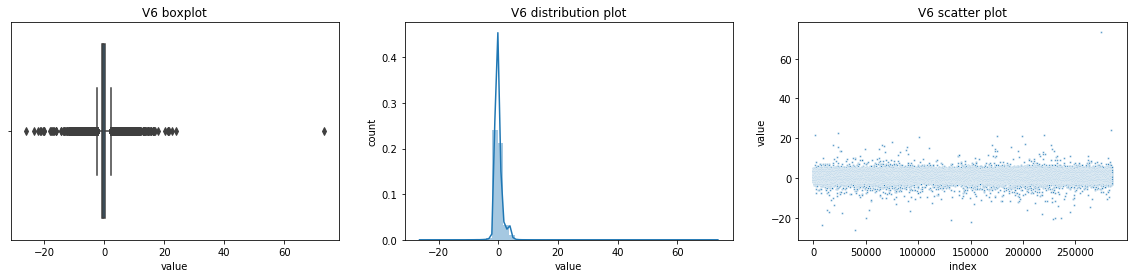

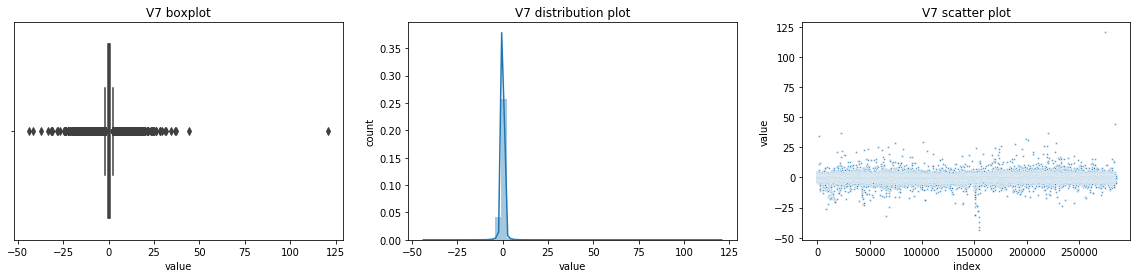

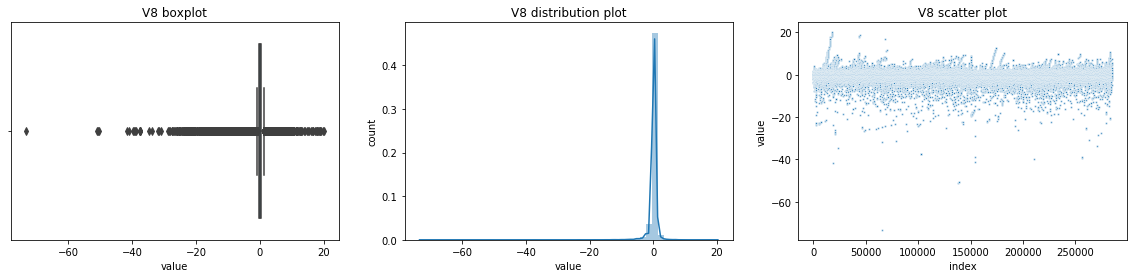

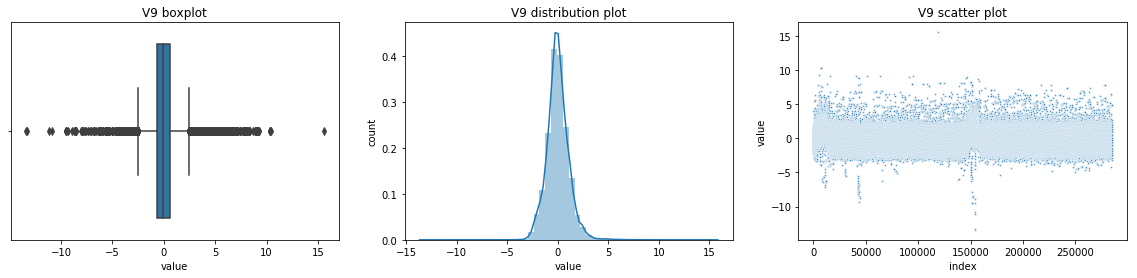

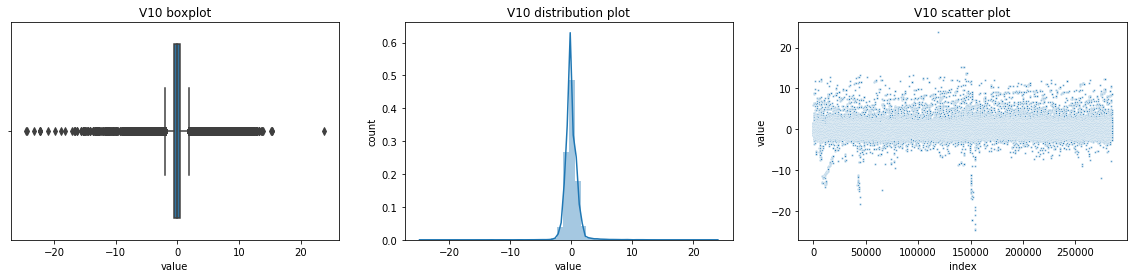

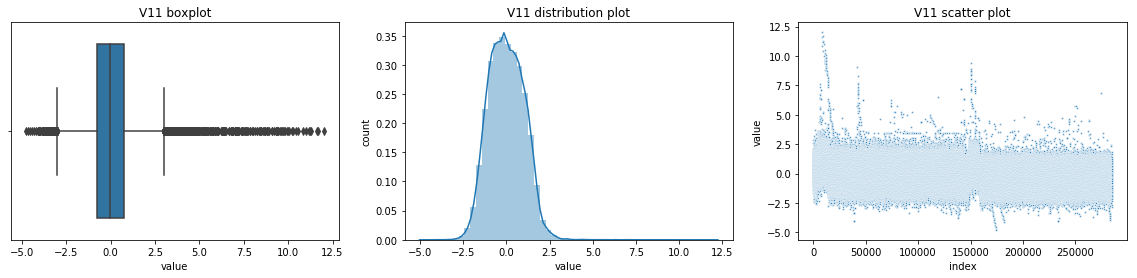

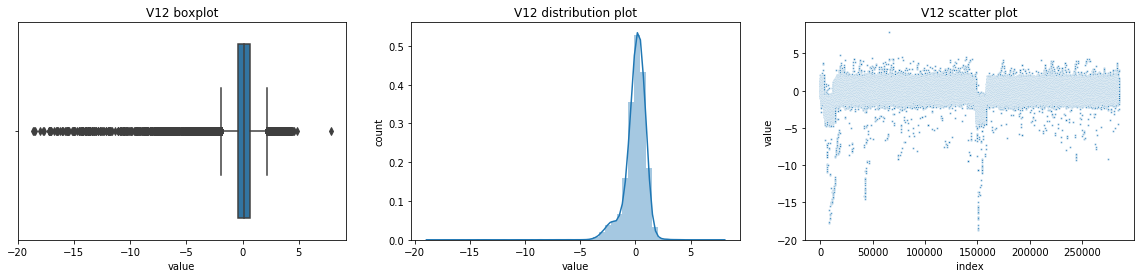

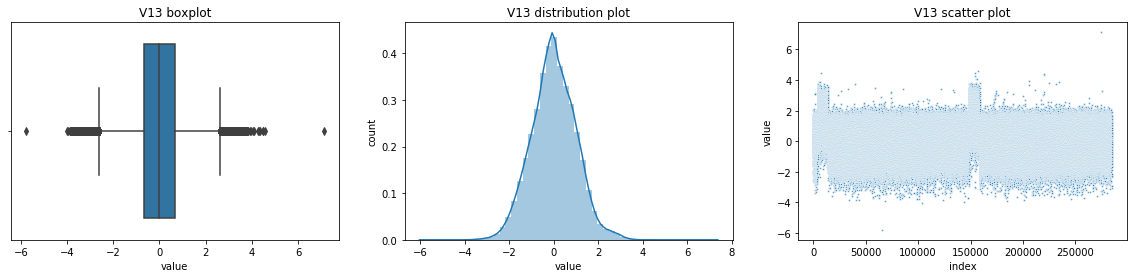

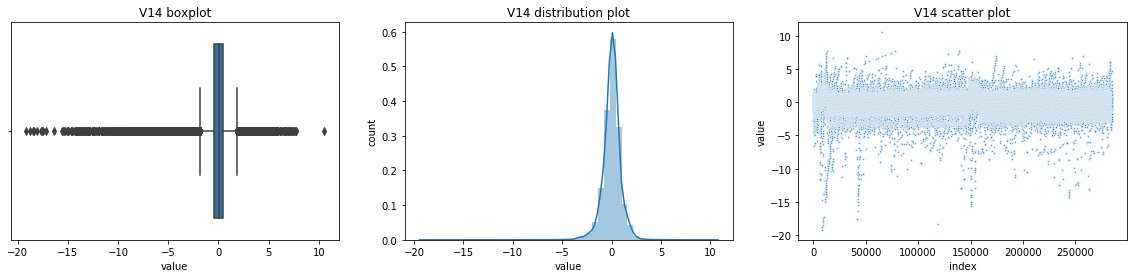

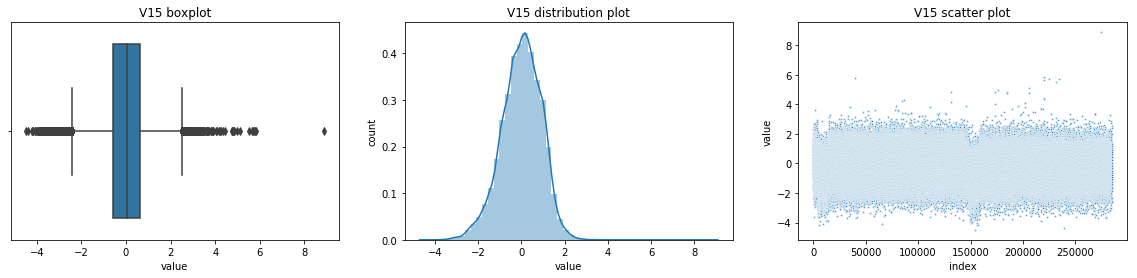

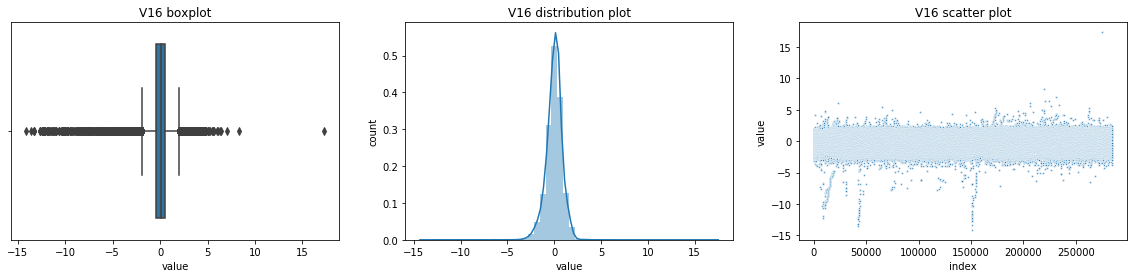

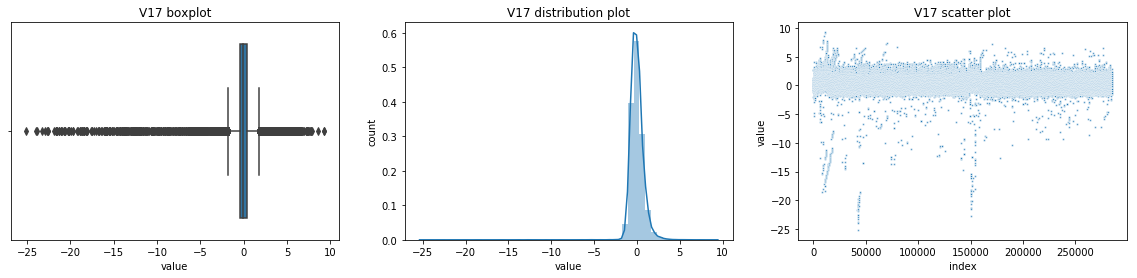

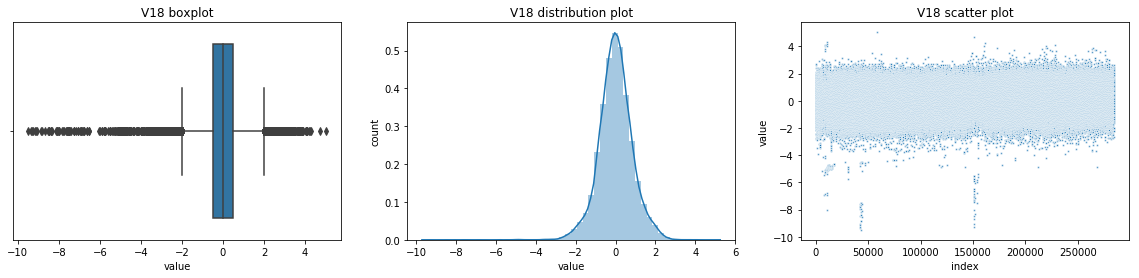

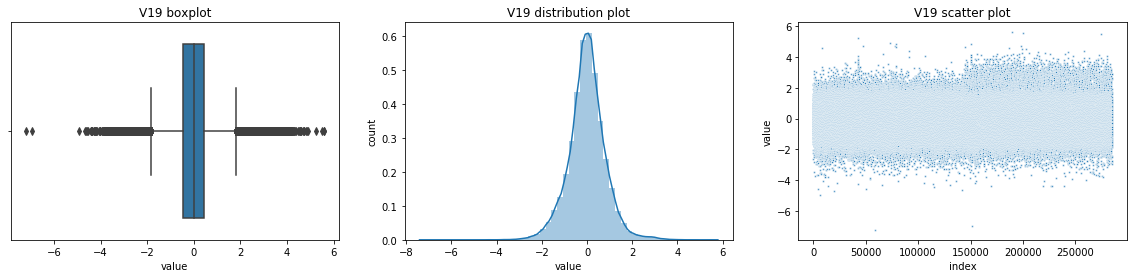

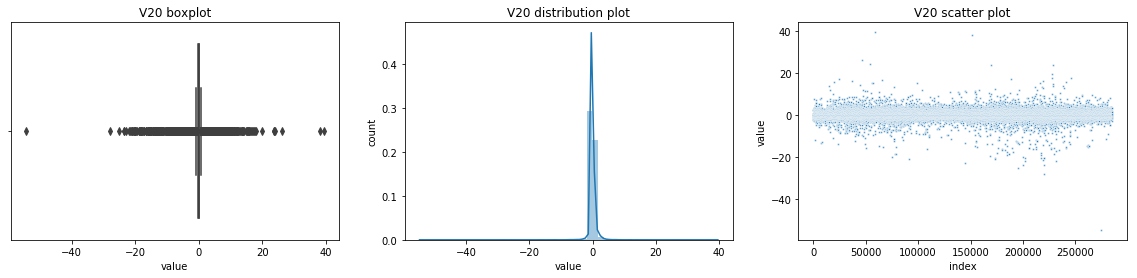

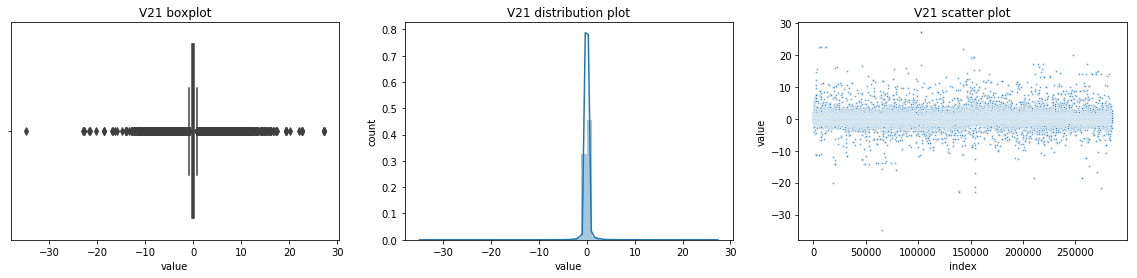

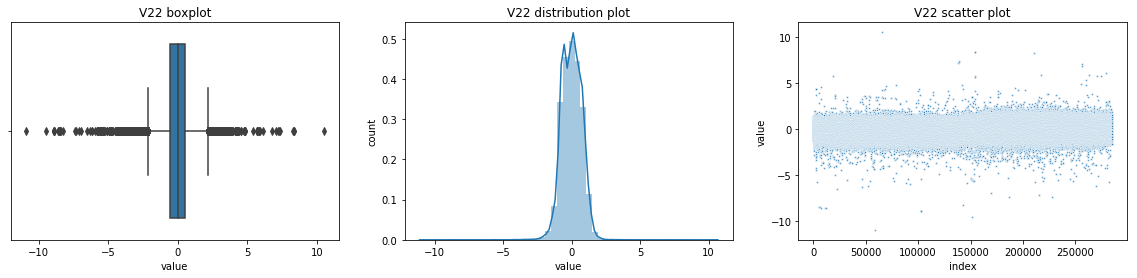

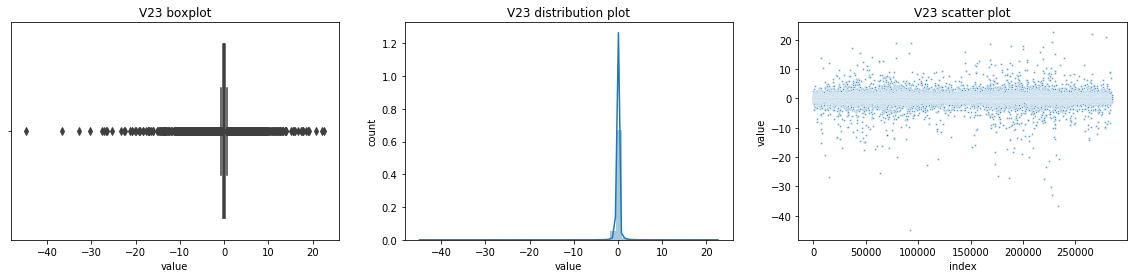

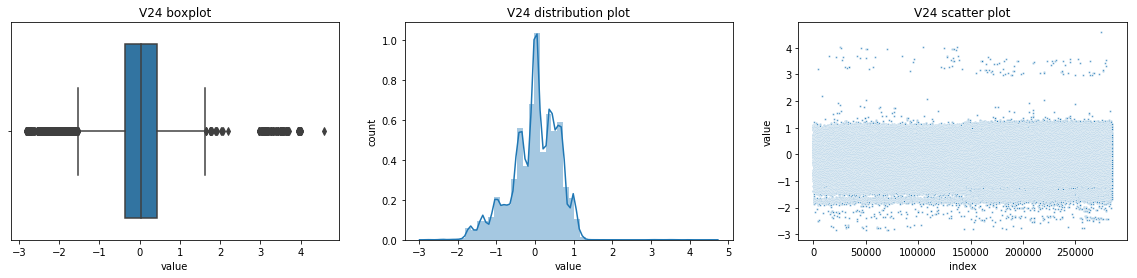

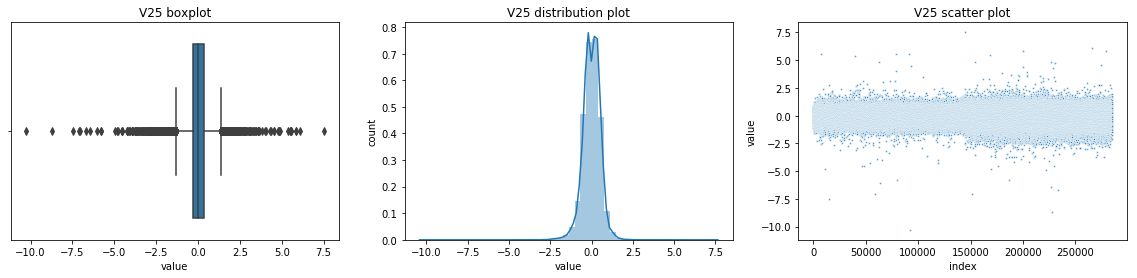

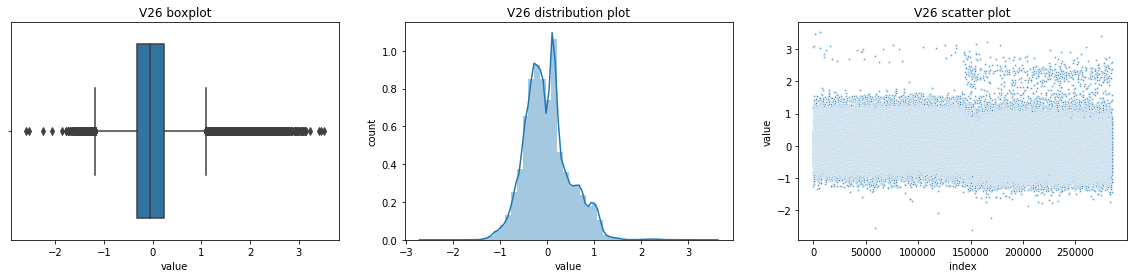

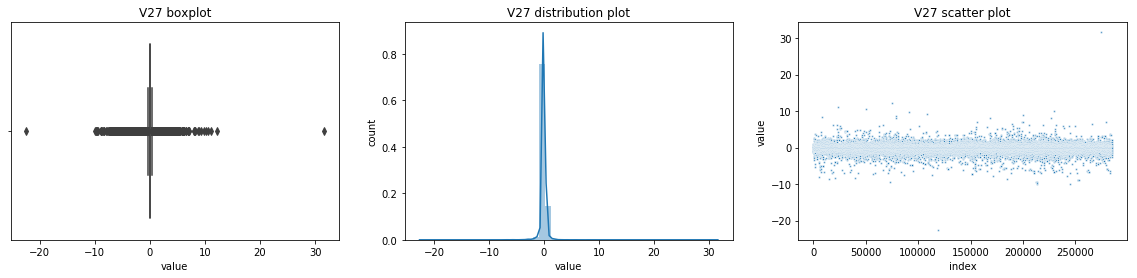

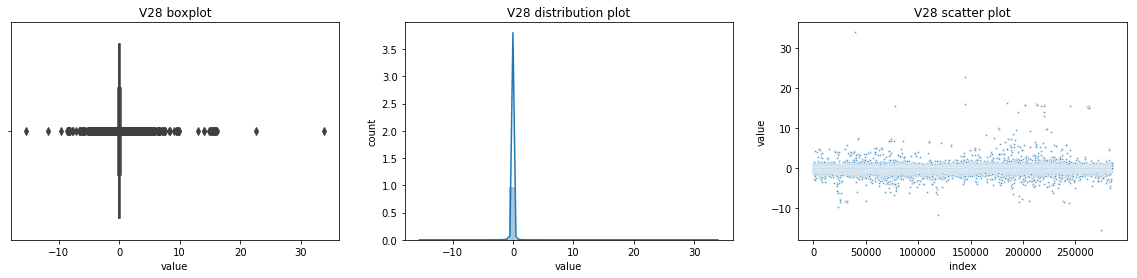

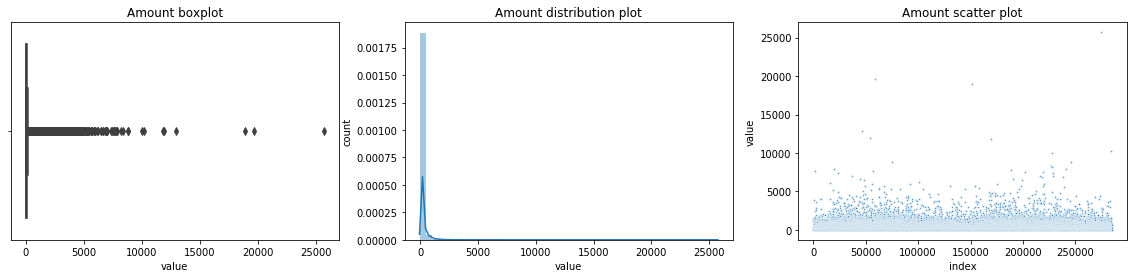

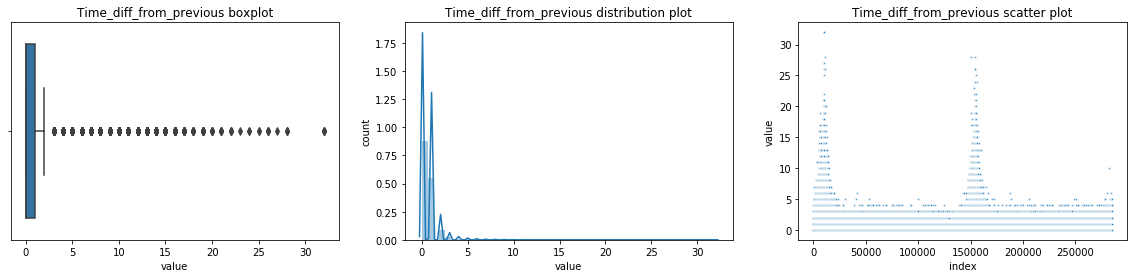

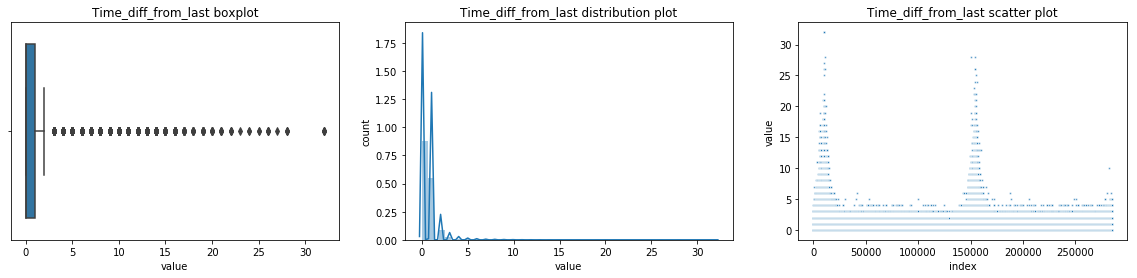

In [46]:
for column in df.drop(['Class'], axis=1).columns :
    plt.figure(figsize=(20, 4))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(df[column])
    plt.title(column + ' boxplot')
    plt.xlabel('value')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[column])
    plt.title(column + ' distribution plot')
    plt.xlabel('value')
    plt.ylabel('probability')
    
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(list(range(df.shape[0])), df[column], s=5, alpha=0.7)
    plt.title(column + ' scatter plot')
    plt.xlabel('index')
    plt.ylabel('value')
    
    plt.show()

# Check how y distributes
- 0 means normal transaction
- 1 means abnormal transaction
- Due to its high class imbalance, this must be solved as novelty detection problem

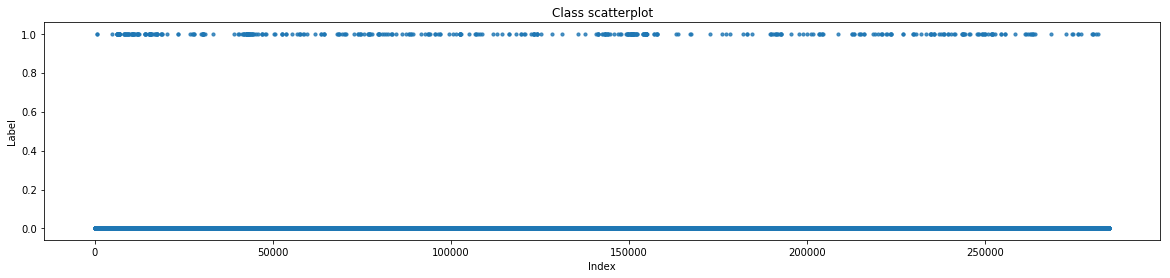

In [138]:
plt.figure(figsize=(20, 4))
plt.scatter(list(range(len(df['Class']))), df['Class'], s=10, alpha=0.8)
plt.title('Class scatterplot')
plt.xlabel('Index')
plt.ylabel('Label')
plt.show()

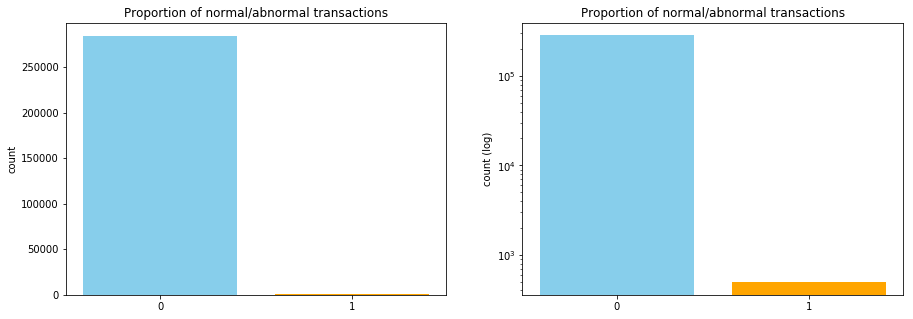

0    284315
1       492
Name: Class, dtype: int64


In [128]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Proportion of normal/abnormal transactions')
plt.bar(['0', '1'], df['Class'].value_counts(), color=['skyblue', 'orange'])
plt.ylabel('count')

plt.subplot(1, 2, 2)
plt.title('Proportion of normal/abnormal transactions in log scale')
plt.bar(['0', '1'], df['Class'].value_counts(), color=['skyblue', 'orange'])
plt.ylabel('count (log)')
plt.yscale('log')
plt.show()
print(df['Class'].value_counts())

# Check linear independency of values
- As features are result of PCA, most of values are lineary independent
- Some of them are not

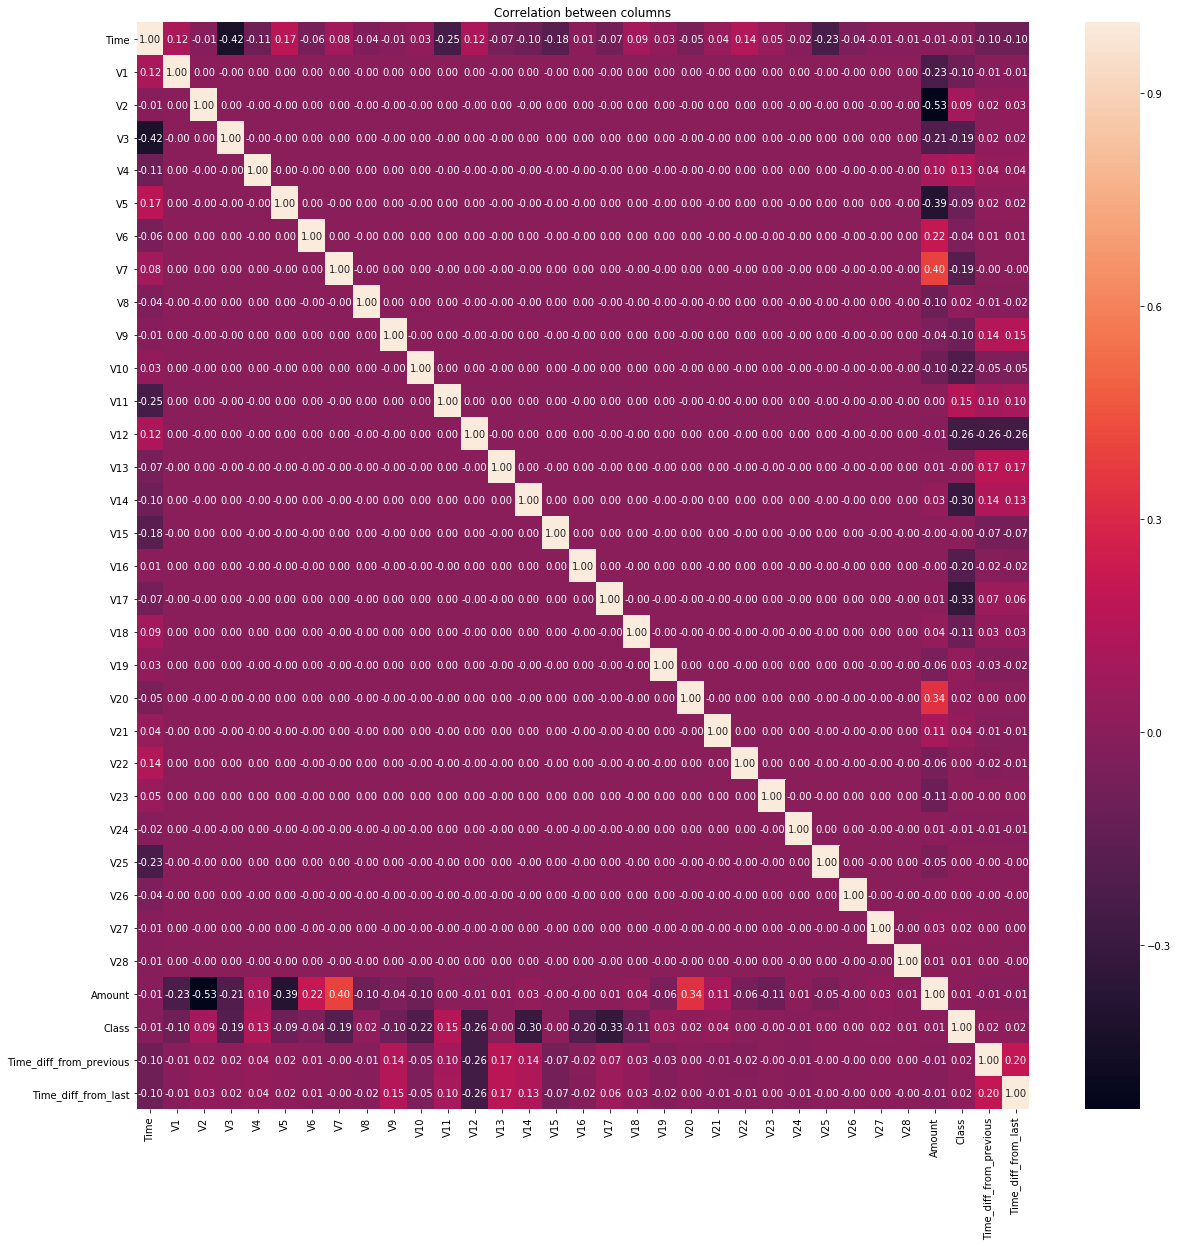

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation between columns')
plt.show()

# Check nonlinear independency
- All of Vs are nonlineary dependent
- All Vs and Amount are nonlineary dependent
- As time nonlineary explians most of Vs (high mutual information score), it might have hidden periodicity

In [119]:
def create_mutual_info_table(df) : 
    temp = pd.DataFrame(columns=df.columns)
    for index in range(len(df.columns)) : 
        temp.loc[index] = np.zeros(len(df.columns))
    temp.index = df.columns
    
    for i, column in enumerate(df.columns) : 
        for j, index in enumerate(df.columns) :
            temp.iloc[i, j] = normalized_mutual_info_score(df[df.columns[i]], df[df.columns[j]])
            
    return temp

df_mutual_info = create_mutual_info_table(df)    

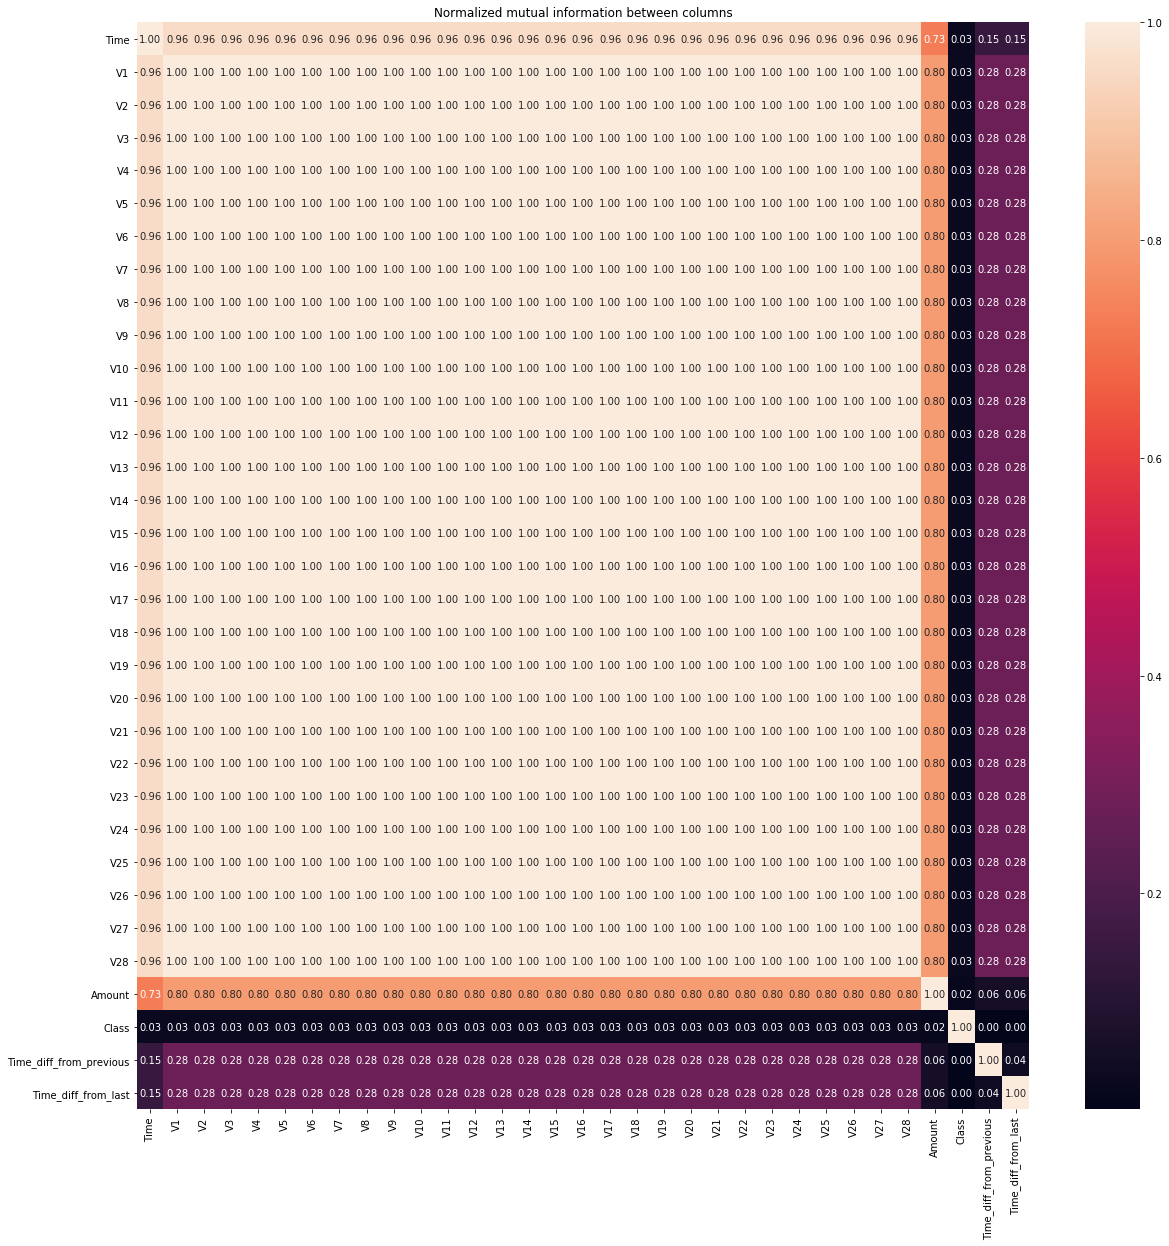

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(df_mutual_info, annot=True, fmt=".2f")
plt.title('Normalized mutual information between columns')
plt.show()

# How distribution differs upon normal/abnormal transcation

In [9]:
df_normal = df[df['Class']==0]
df_abnormal = df[df['Class']==1]

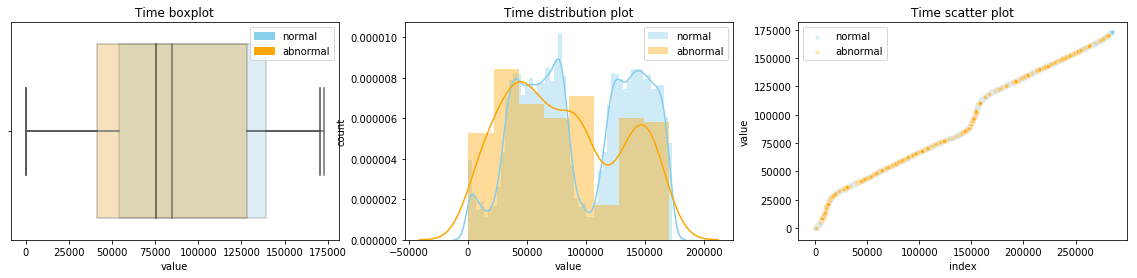

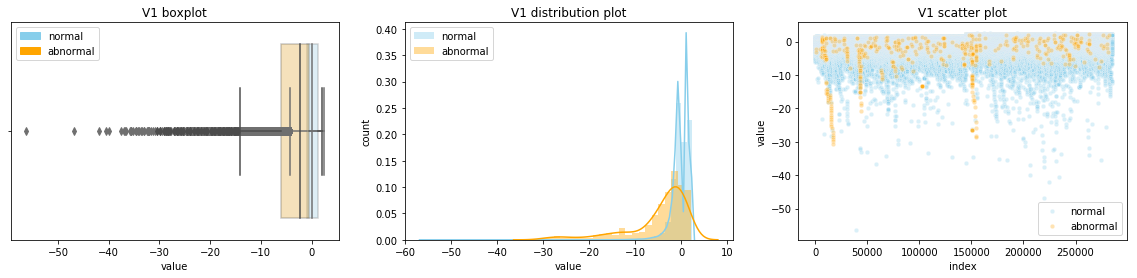

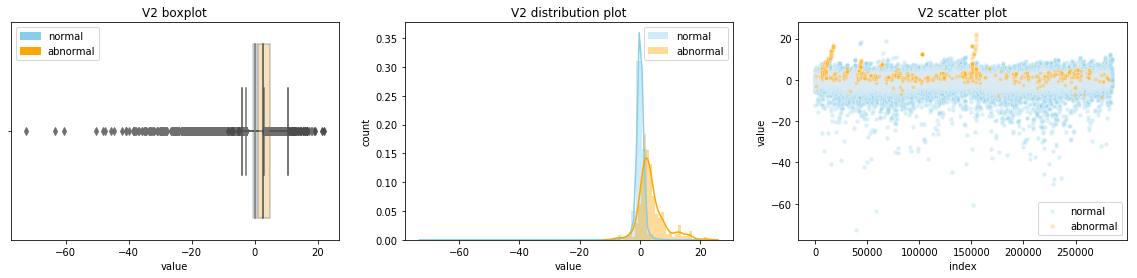

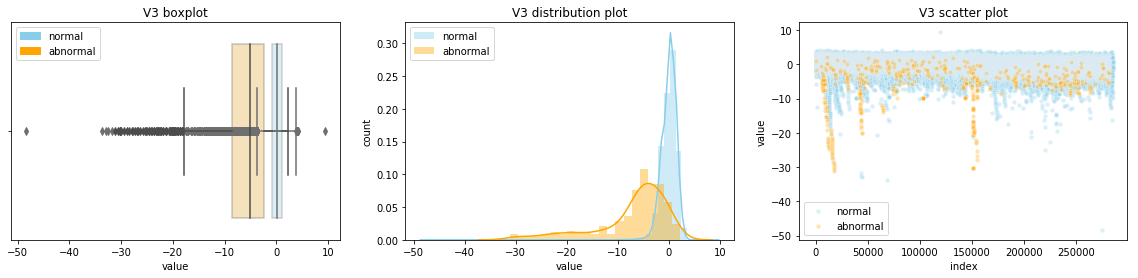

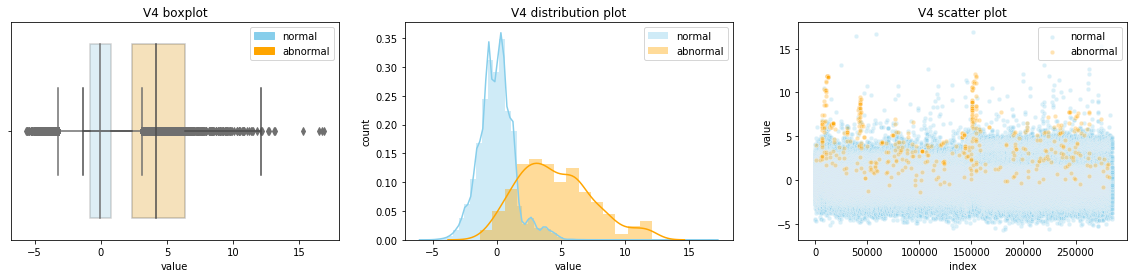

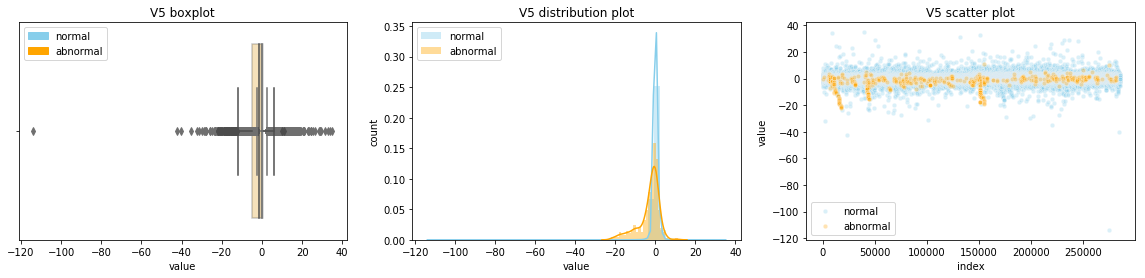

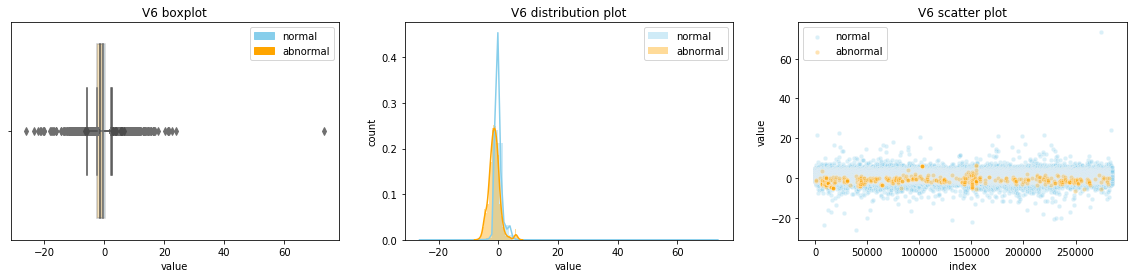

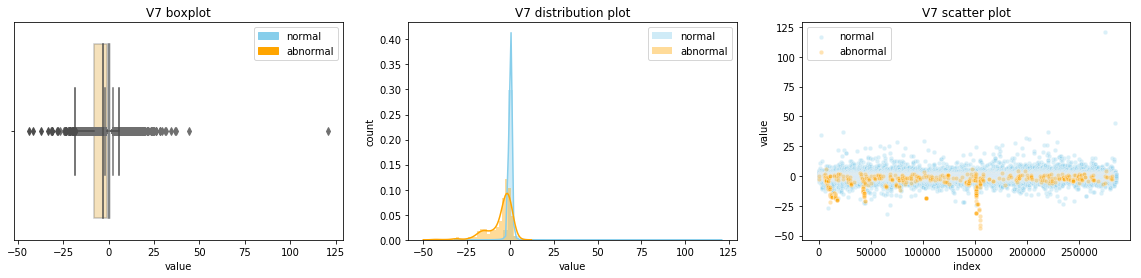

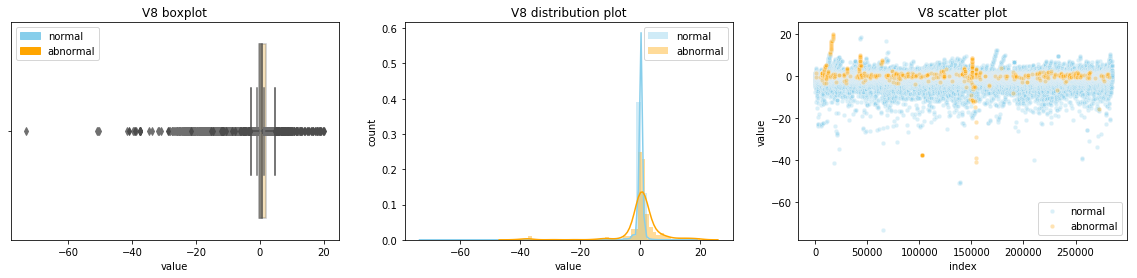

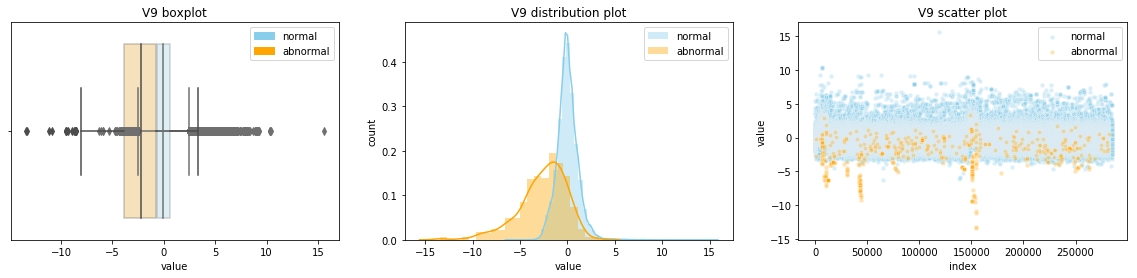

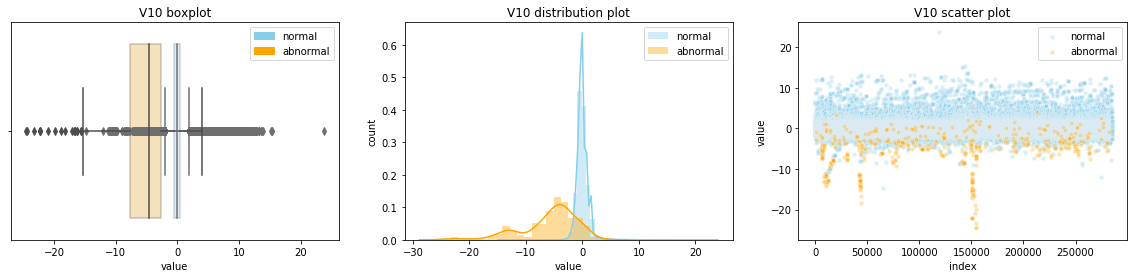

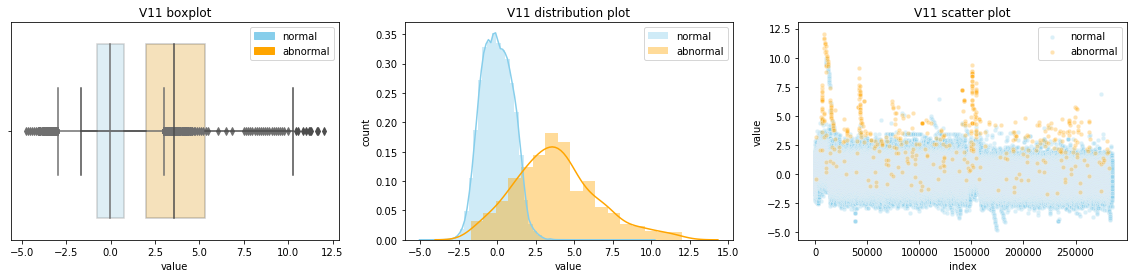

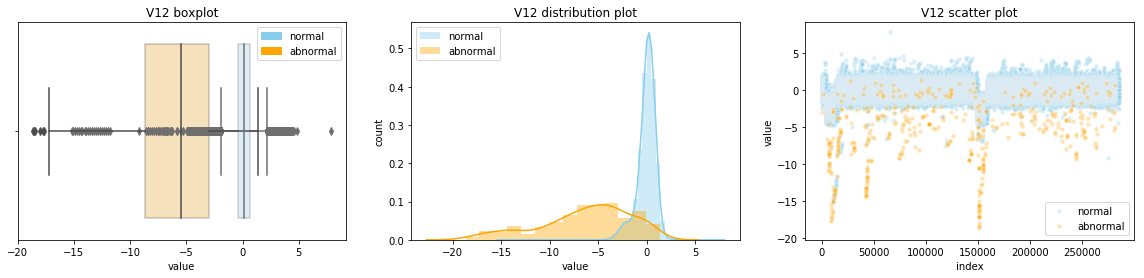

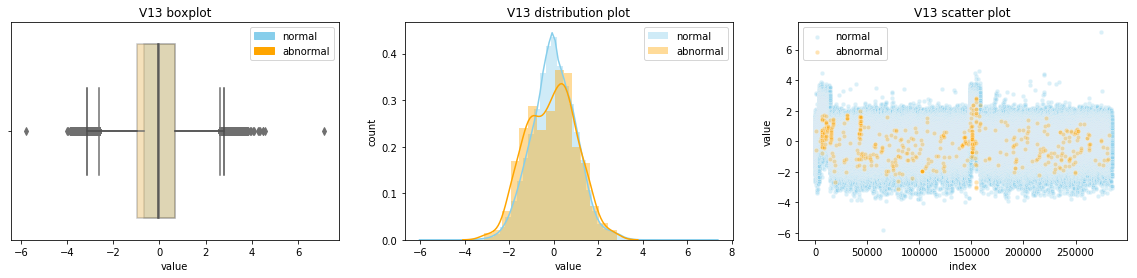

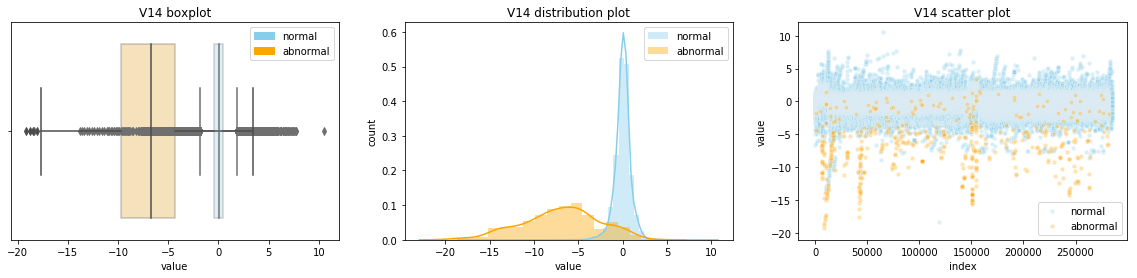

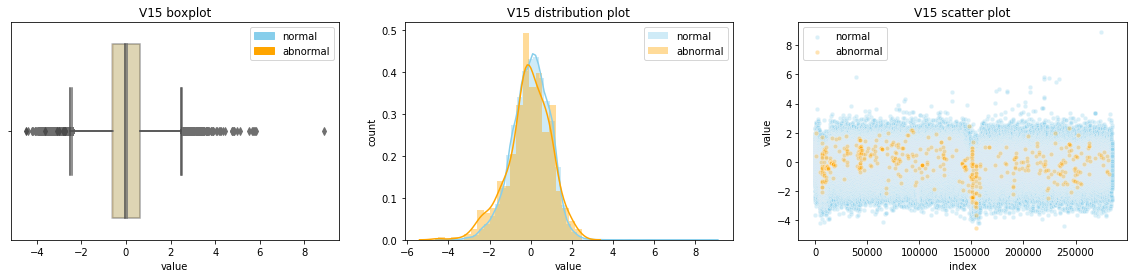

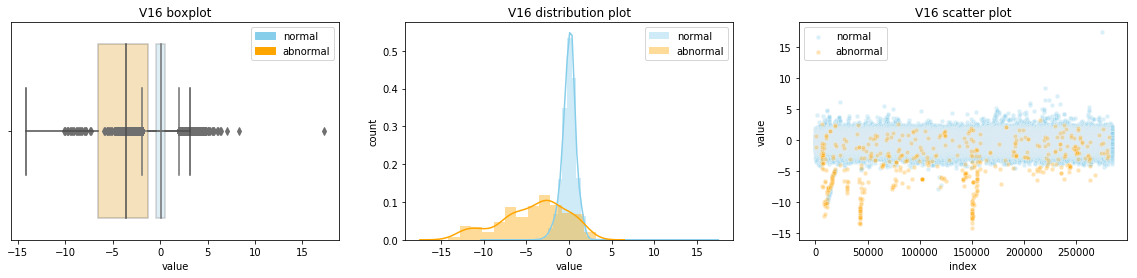

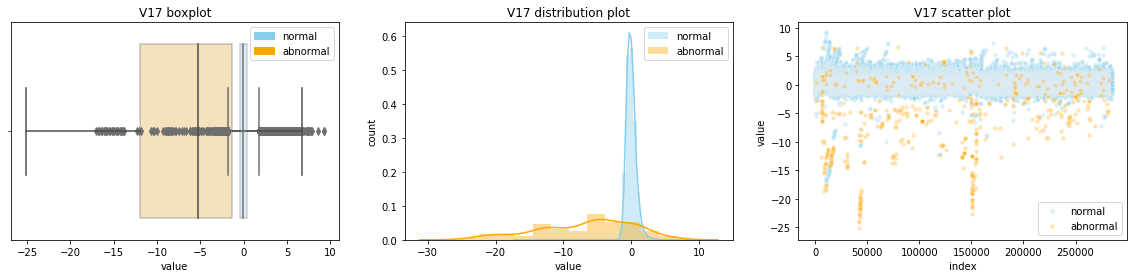

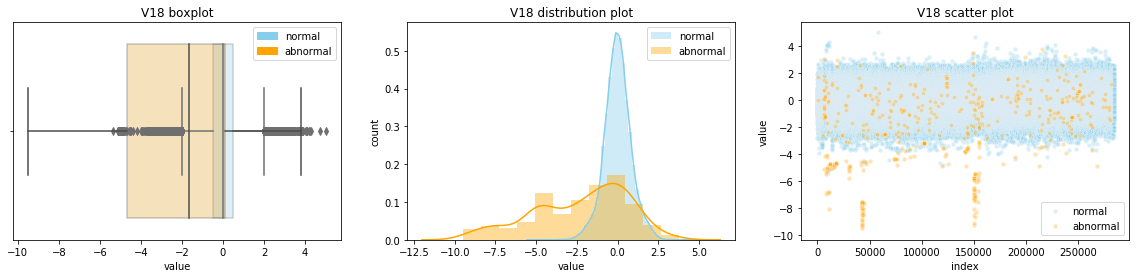

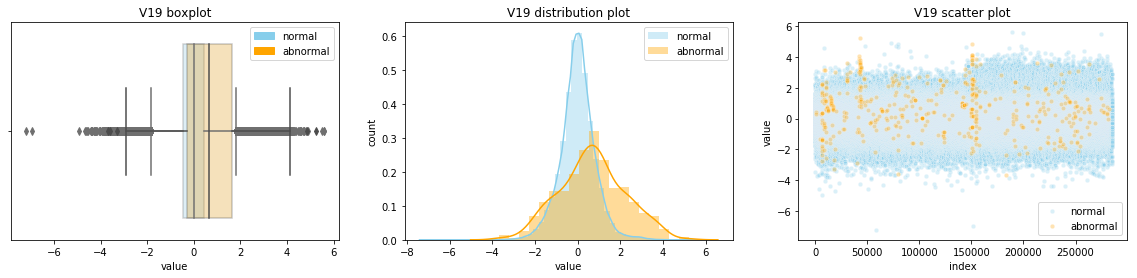

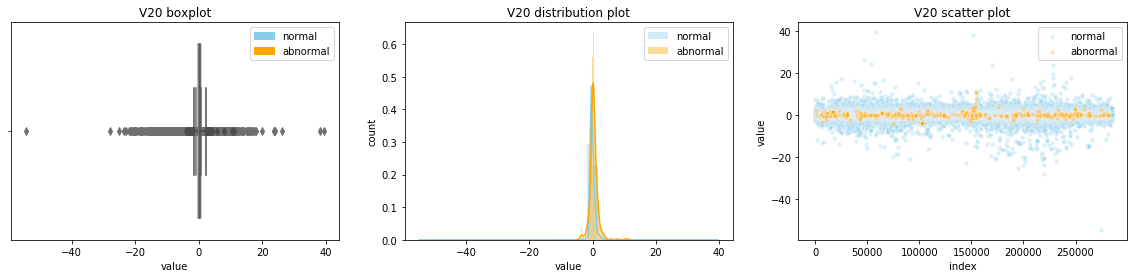

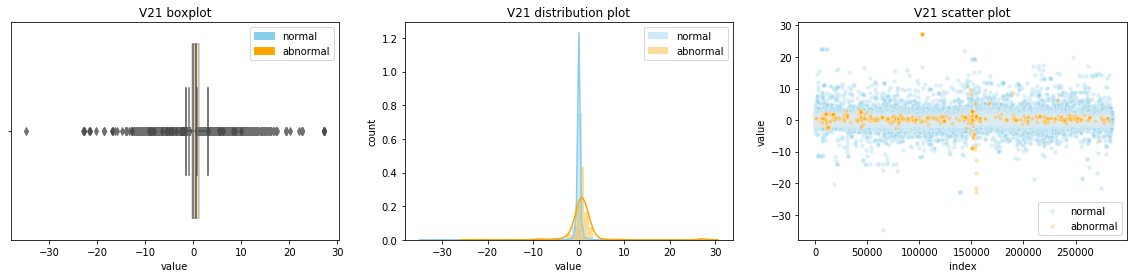

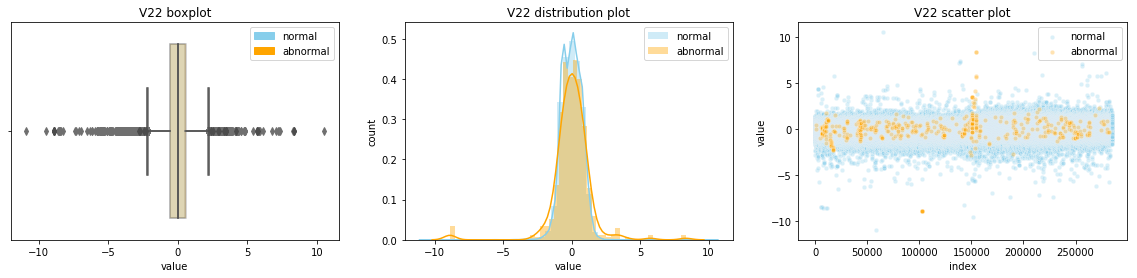

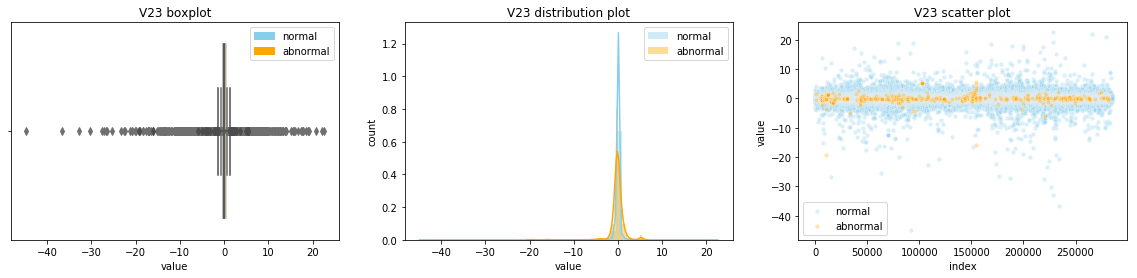

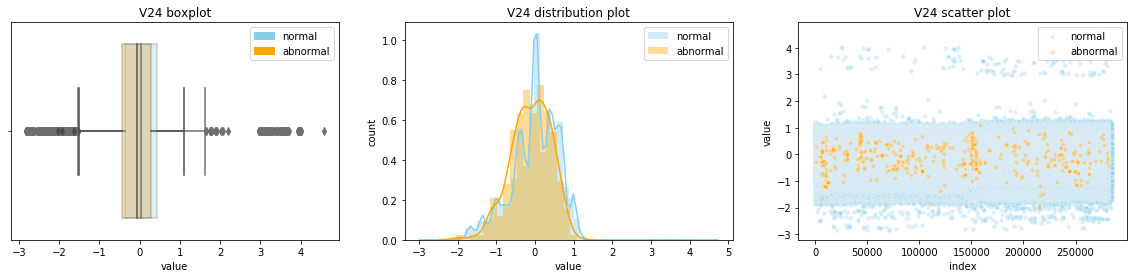

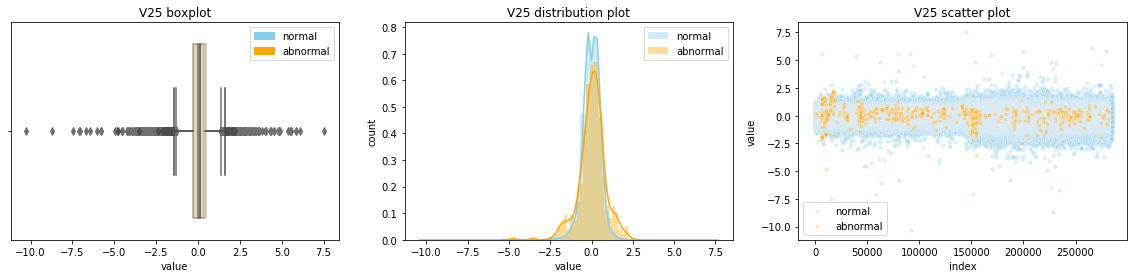

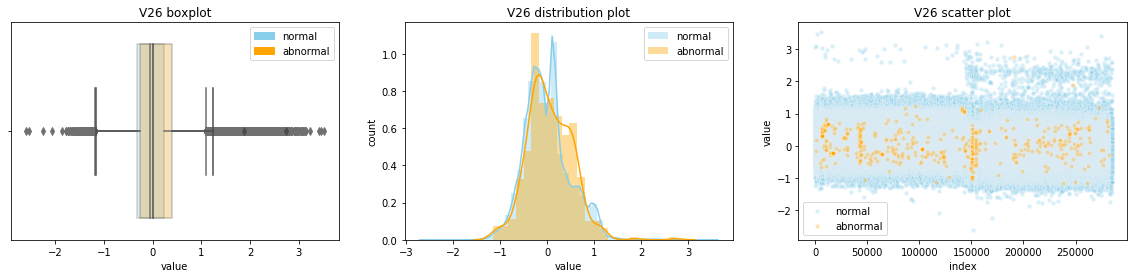

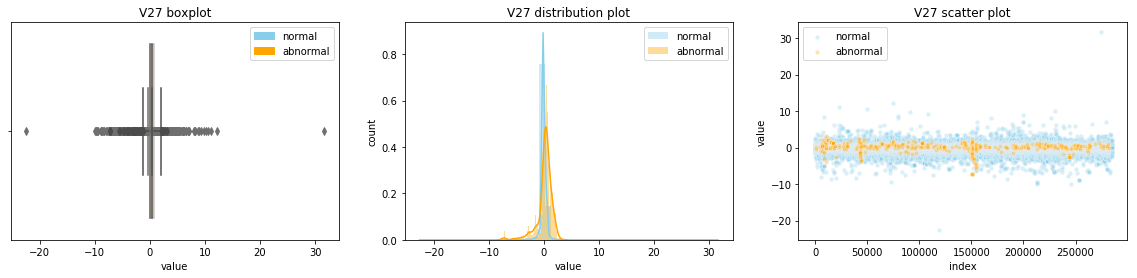

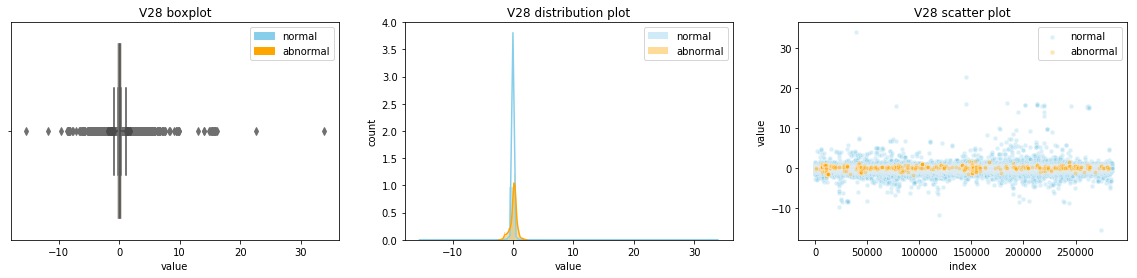

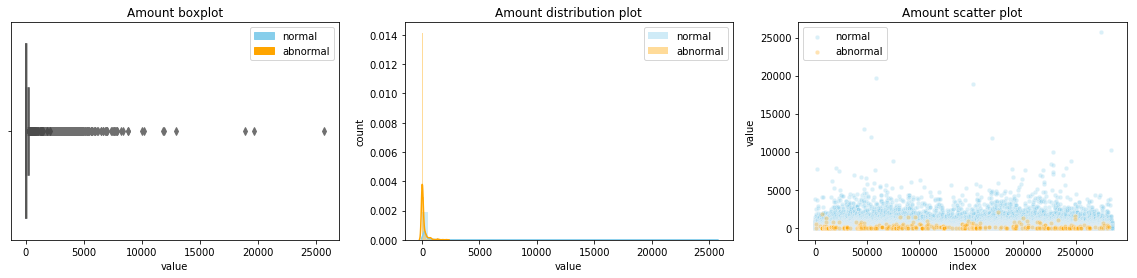

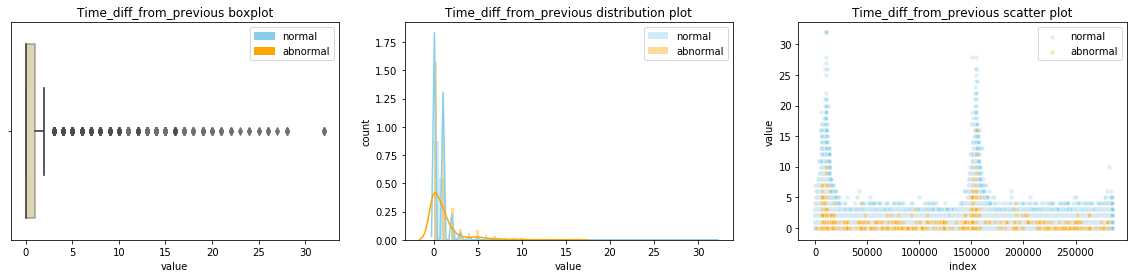

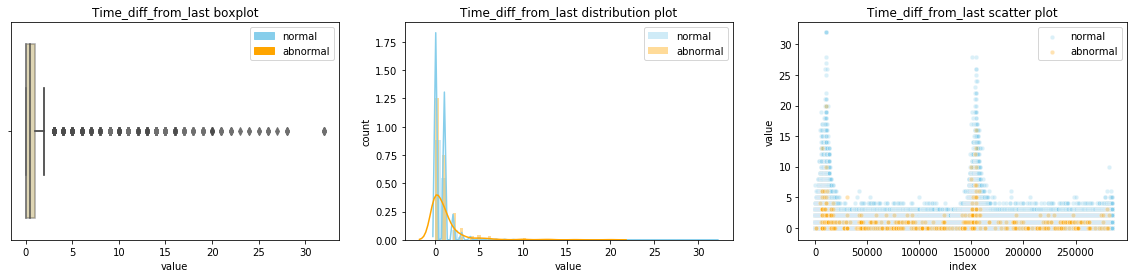

In [177]:
for column in df.drop(['Class'], axis=1).columns :
    plt.figure(figsize=(20, 4))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(df_normal[column], color='skyblue', boxprops=dict(alpha=.3))
    sns.boxplot(df_abnormal[column], color='orange', boxprops=dict(alpha=.3))
    plt.title(column + ' boxplot')
    plt.xlabel('value')
    skyblue_patch = mpatches.Patch(color='skyblue', label='normal')
    orange_patch = mpatches.Patch(color='orange', label='abnormal')
    plt.legend(handles=[skyblue_patch, orange_patch])
    
    plt.subplot(1, 3, 2)
    sns.distplot(df_normal[column], color='skyblue', label='normal')
    sns.distplot(df_abnormal[column], color='orange', label='abnormal')
    plt.title(column + ' distribution plot')
    plt.xlabel('value')
    plt.ylabel('probability')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(df_normal.index, df_normal[column], s=20, alpha=0.3, color='skyblue', label='normal')
    sns.scatterplot(df_abnormal.index, df_abnormal[column], s=20, alpha=0.3, color='orange', label='abnormal')
    plt.title(column + ' scatter plot')
    plt.xlabel('index')
    plt.ylabel('value')
    plt.legend()
    
    plt.show()

# How linear dependency differs upton normal/abnormal

- As PCA has done with lots of normal data and few abnormal data, of course abnormal data will not be succesfully reconstructed via PCA
- That's why it shows linear dependency
- Novelty Detection can be also perfomed with PCA, but as we don't have basis matrix, that's not a possible option
- Lineary dependency between Vs of abnormal data can be a clue to find them

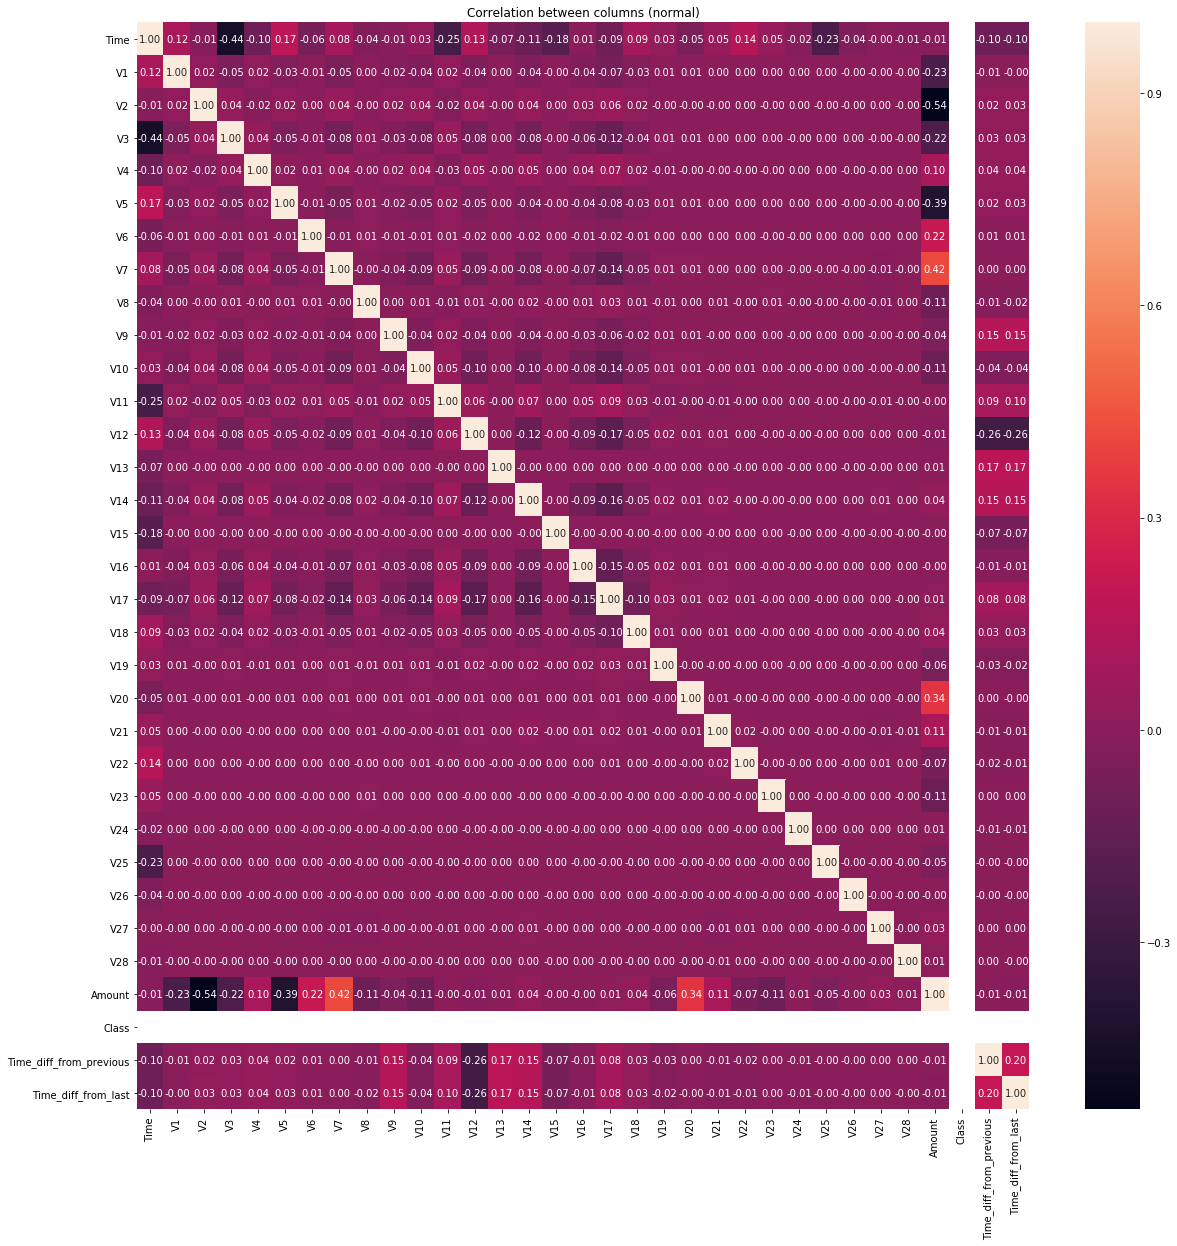

In [178]:
plt.figure(figsize=(20,20))
sns.heatmap(df_normal.corr(), annot=True, fmt=".2f")
plt.title('Correlation between columns (normal)')
plt.show()

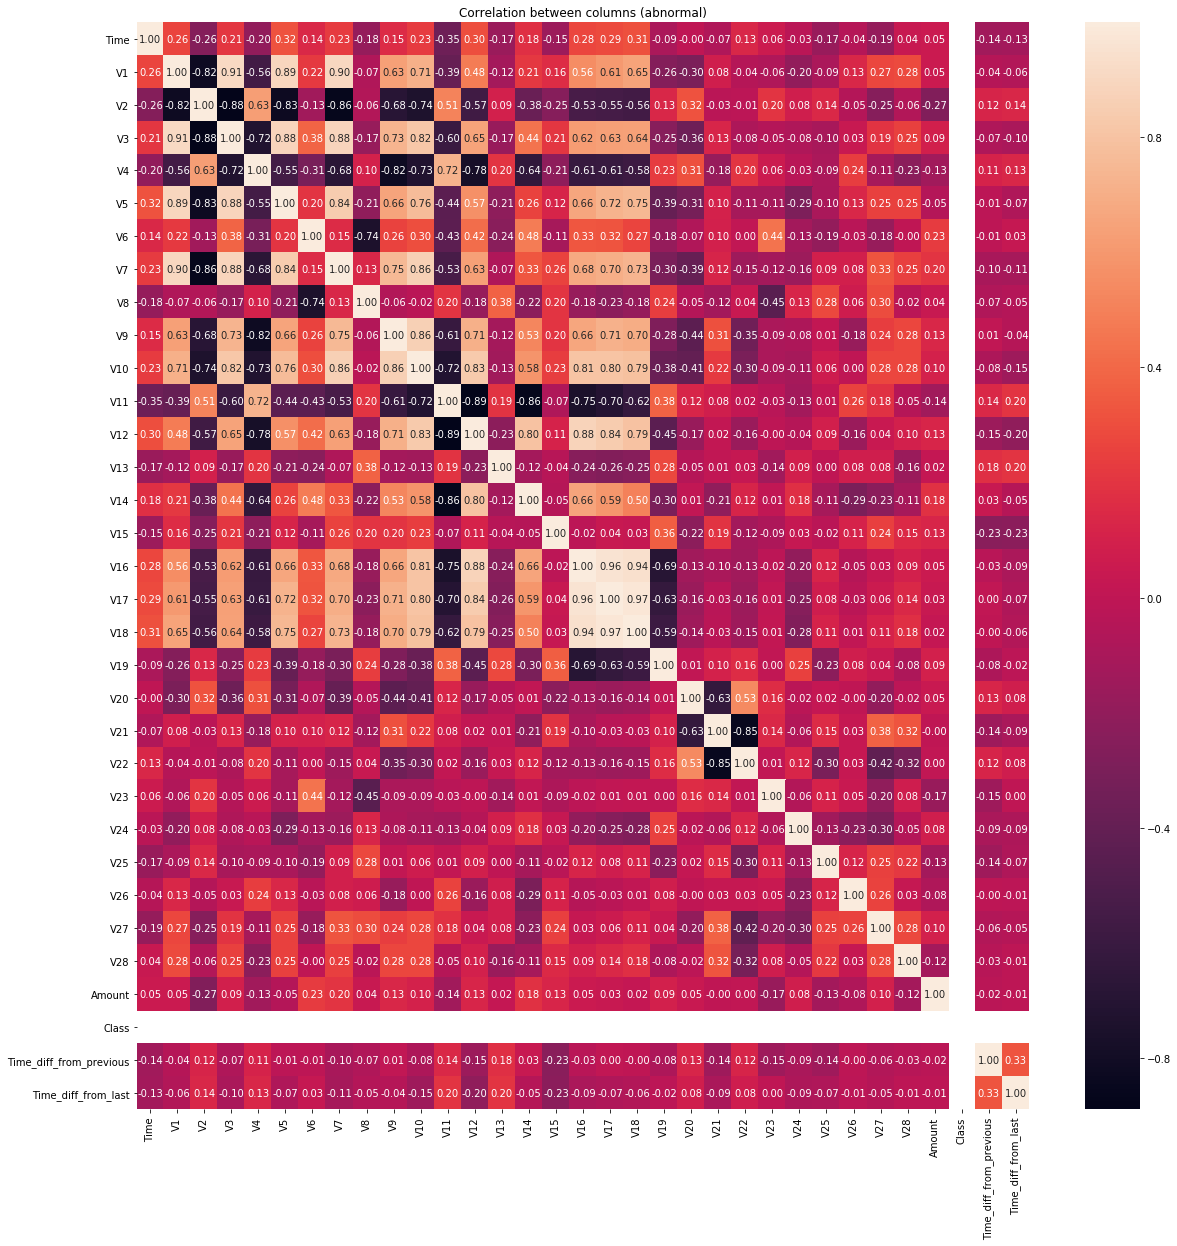

In [179]:
plt.figure(figsize=(20,20))
sns.heatmap(df_abnormal.corr(), annot=True, fmt=".2f")
plt.title('Correlation between columns (abnormal)')
plt.show()

# How nonlinear dependency differs upton normal/abnormal
- High nonlinear dependency in normal data
- High nonlinear dependency in abnormal data
- What different is, time difference from previous/next transaction shows higher dependency in abnormal data
- It means, time difference with previous/next transaction matters to detect credit card fraud 
- Again, time showed high mutual information score on normal/abnormal data
- It might have hidden periodicity

In [180]:
df_normal_mutual_info = create_mutual_info_table(df_normal)

In [181]:
df_abnormal_mutual_info = create_mutual_info_table(df_abnormal)

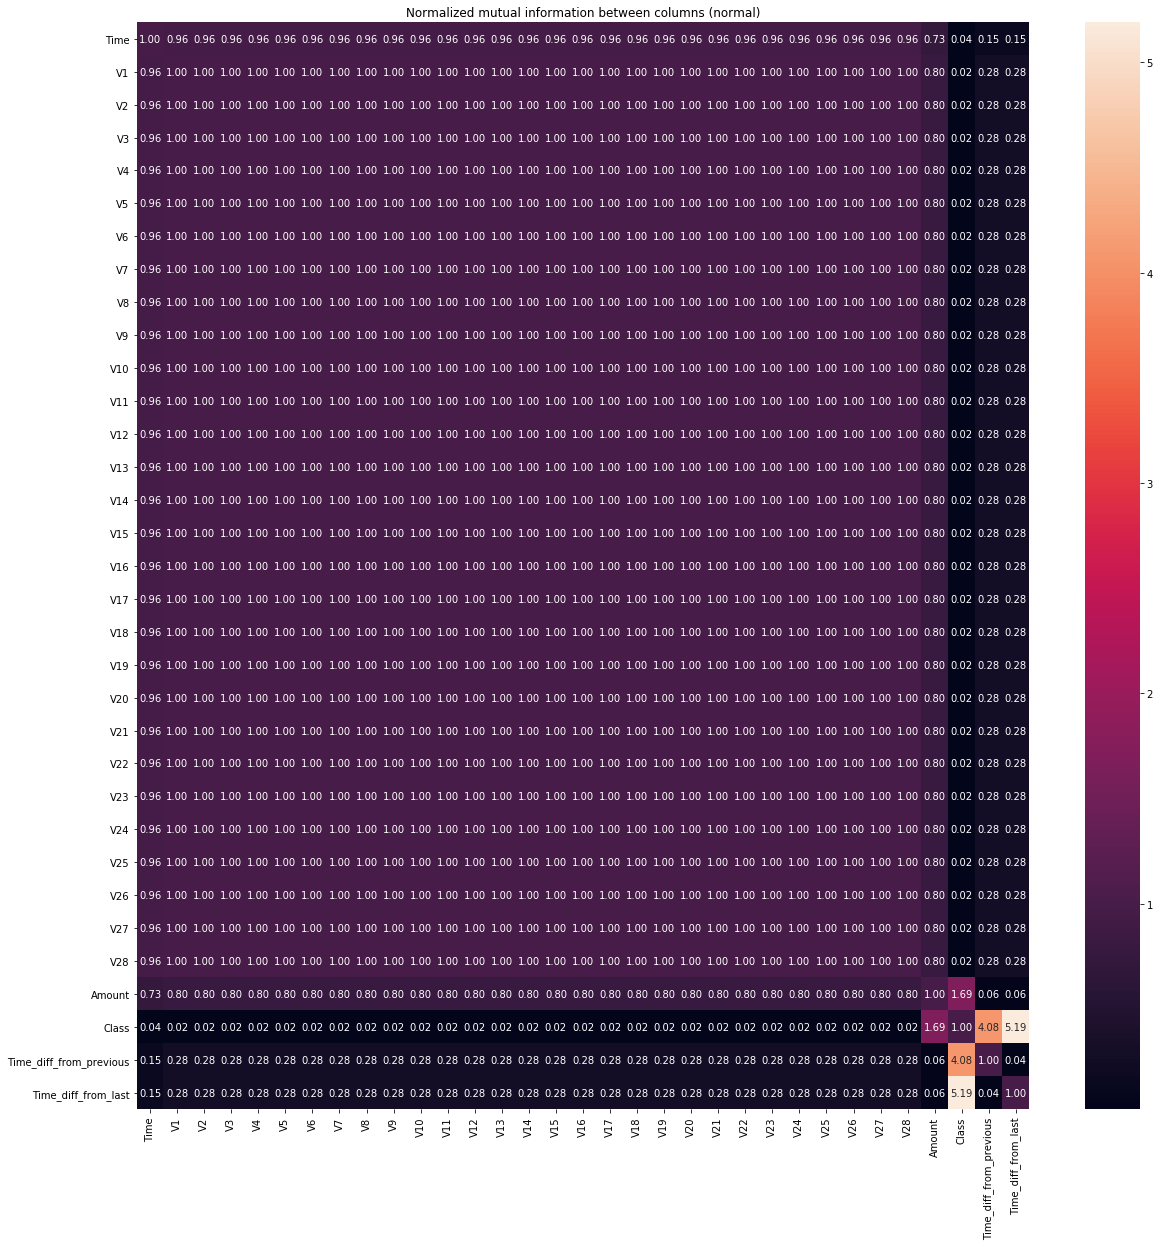

In [182]:
plt.figure(figsize=(20,20))
sns.heatmap(df_normal_mutual_info, annot=True, fmt=".2f")
plt.title('Normalized mutual information between columns (normal)')
plt.show()

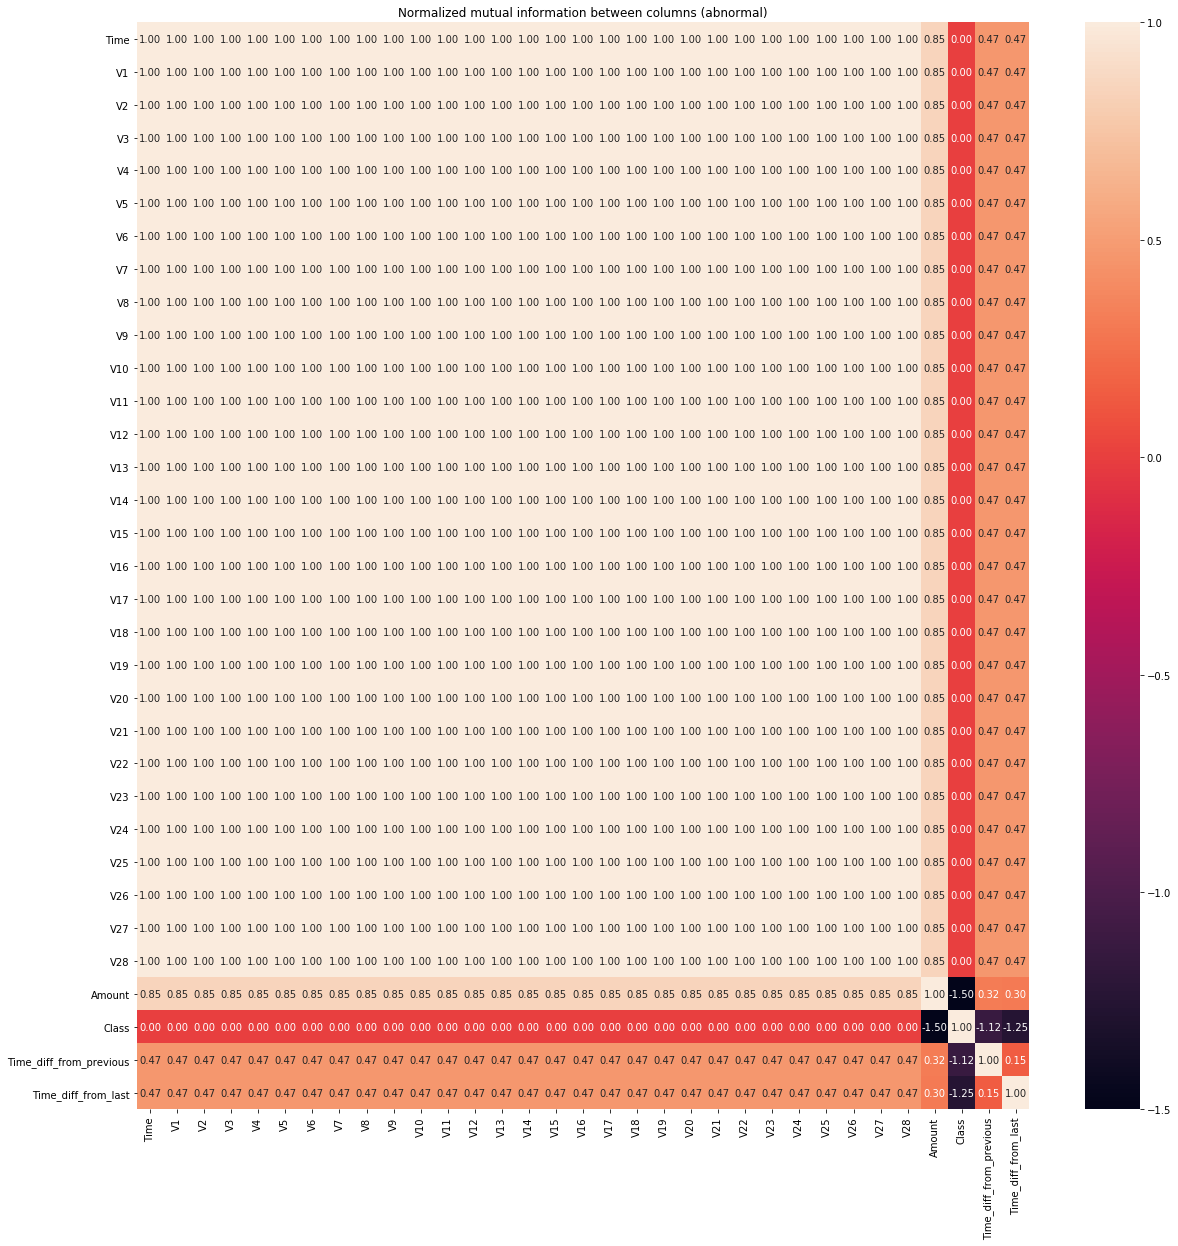

In [183]:
plt.figure(figsize=(20,20))
sns.heatmap(df_abnormal_mutual_info, annot=True, fmt=".2f")
plt.title('Normalized mutual information between columns (abnormal)')
plt.show()

# Strong nonlinear dependency betwwen Class, Amount, Time_diff
- Time_diff and Amount showed strong nonlinear dependency
- Unable to be found by 2D plots

In [22]:
def show_deeper(column, xlim_start, xlim_end) : 

    plt.figure(figsize=(20, 40))
    
    plt.subplot(7, 1, 1)
    sns.boxplot(df_normal[column], color='skyblue', boxprops=dict(alpha=.3))
    sns.boxplot(df_abnormal[column], color='orange', boxprops=dict(alpha=.3))
    plt.title(column + ' boxplot')
    plt.xlabel('value')
    skyblue_patch = mpatches.Patch(color='skyblue', label='normal')
    orange_patch = mpatches.Patch(color='orange', label='abnormal')
    plt.legend(handles=[skyblue_patch, orange_patch])
  
    plt.subplot(7, 1, 2)
    sns.boxplot(df_normal[column], color='skyblue', boxprops=dict(alpha=.3))
    sns.boxplot(df_abnormal[column], color='orange', boxprops=dict(alpha=.3))
    plt.title(column + ' boxplot (0~1000)')
    plt.xlabel('value (0~1000)')
    plt.xlim(xlim_start, xlim_end)
    skyblue_patch = mpatches.Patch(color='skyblue', label='normal')
    orange_patch = mpatches.Patch(color='orange', label='abnormal')
    plt.legend(handles=[skyblue_patch, orange_patch])    
    
    plt.subplot(7, 1, 3)
    sns.distplot(df_normal[column], color='skyblue', label='normal')
    sns.distplot(df_abnormal[column], color='orange', label='abnormal')
    plt.title(column + ' distribution plot')
    plt.xlabel('value')
    plt.ylabel('probability')
    plt.legend()    
    
    plt.subplot(7, 1, 4)
    sns.distplot(df_normal[column], color='skyblue', label='normal')
    sns.distplot(df_abnormal[column], color='orange', label='abnormal')
    plt.title(column + ' distribution plot (0~1000)')
    plt.xlabel('value (0~1000)')
    plt.ylabel('probability')
    plt.xlim(xlim_start, xlim_end)
    plt.legend()

    plt.subplot(7, 1, 5)
    plt.hist(df_normal[column], color='skyblue', label='normal', alpha=0.7)
    plt.hist(df_abnormal[column], color='orange', label='abnormal', alpha=0.7)
    plt.title(column + ' histogram')
    plt.xlabel('value')
    plt.ylabel('count')
    plt.legend()

    plt.subplot(7, 1, 6)
    plt.hist(df_normal[column], color='skyblue', label='normal', alpha=0.7)
    plt.hist(df_abnormal[column], color='orange', label='abnormal', alpha=0.7)
    plt.title(column + ' histogram (log scale)')
    plt.xlabel('value')
    plt.ylabel('count (log)')
    plt.yscale('log')
    plt.legend()
    
    plt.subplot(7, 1, 7)
    sns.scatterplot(df_normal.index, df_normal[column], s=20, alpha=0.3, color='skyblue', label='normal')
    sns.scatterplot(df_abnormal.index, df_abnormal[column], s=20, alpha=0.3, color='orange', label='abnormal')
    plt.title(column + ' scatter plot')
    plt.xlabel('index')
    plt.ylabel('value')
    plt.legend()
    
    plt.show()

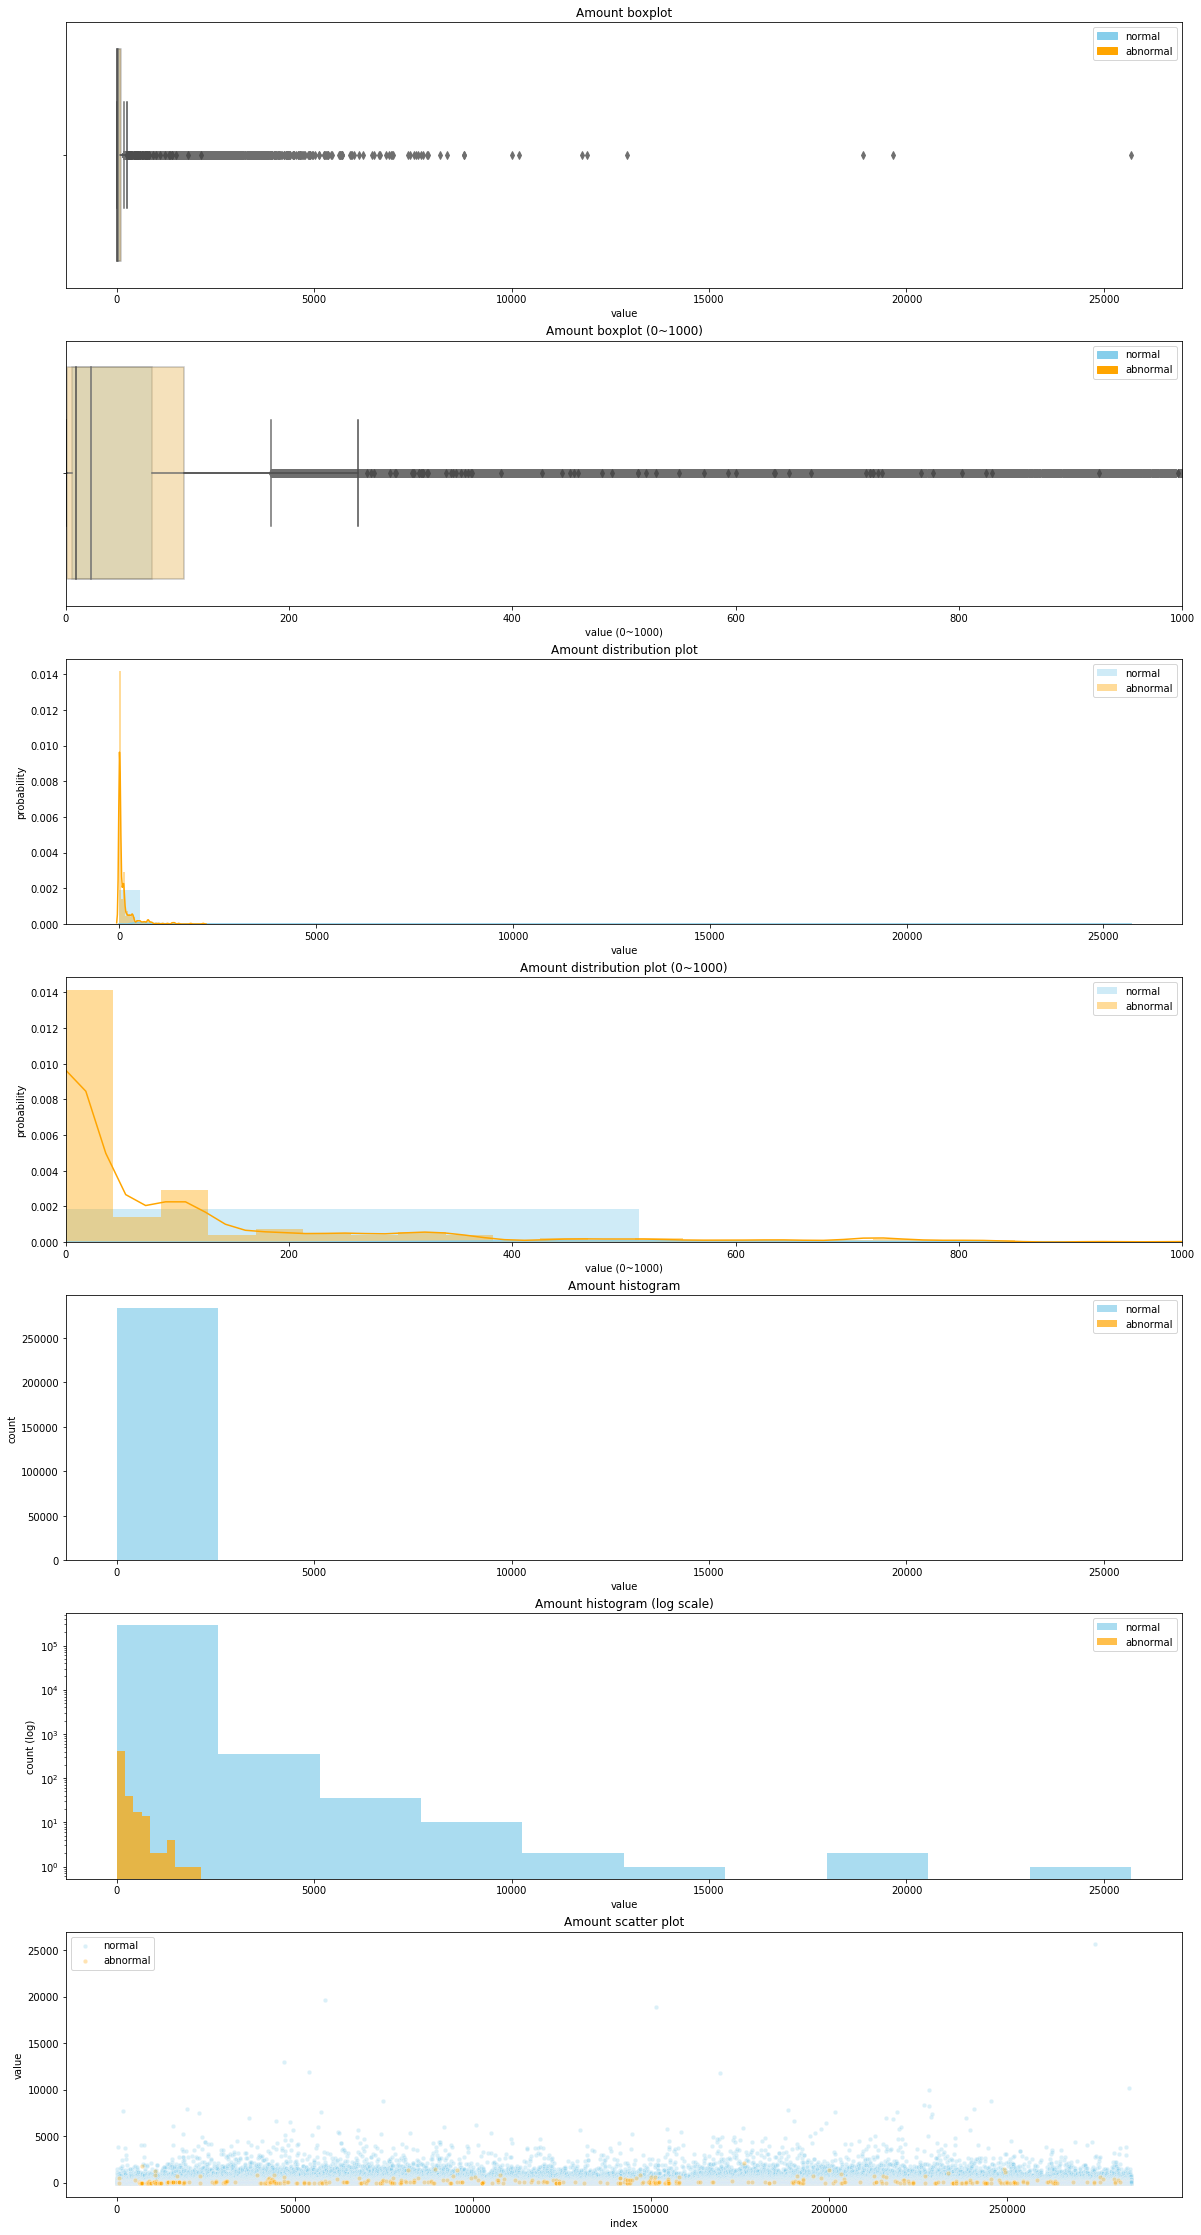

In [23]:
show_deeper('Amount', 0, 1000)

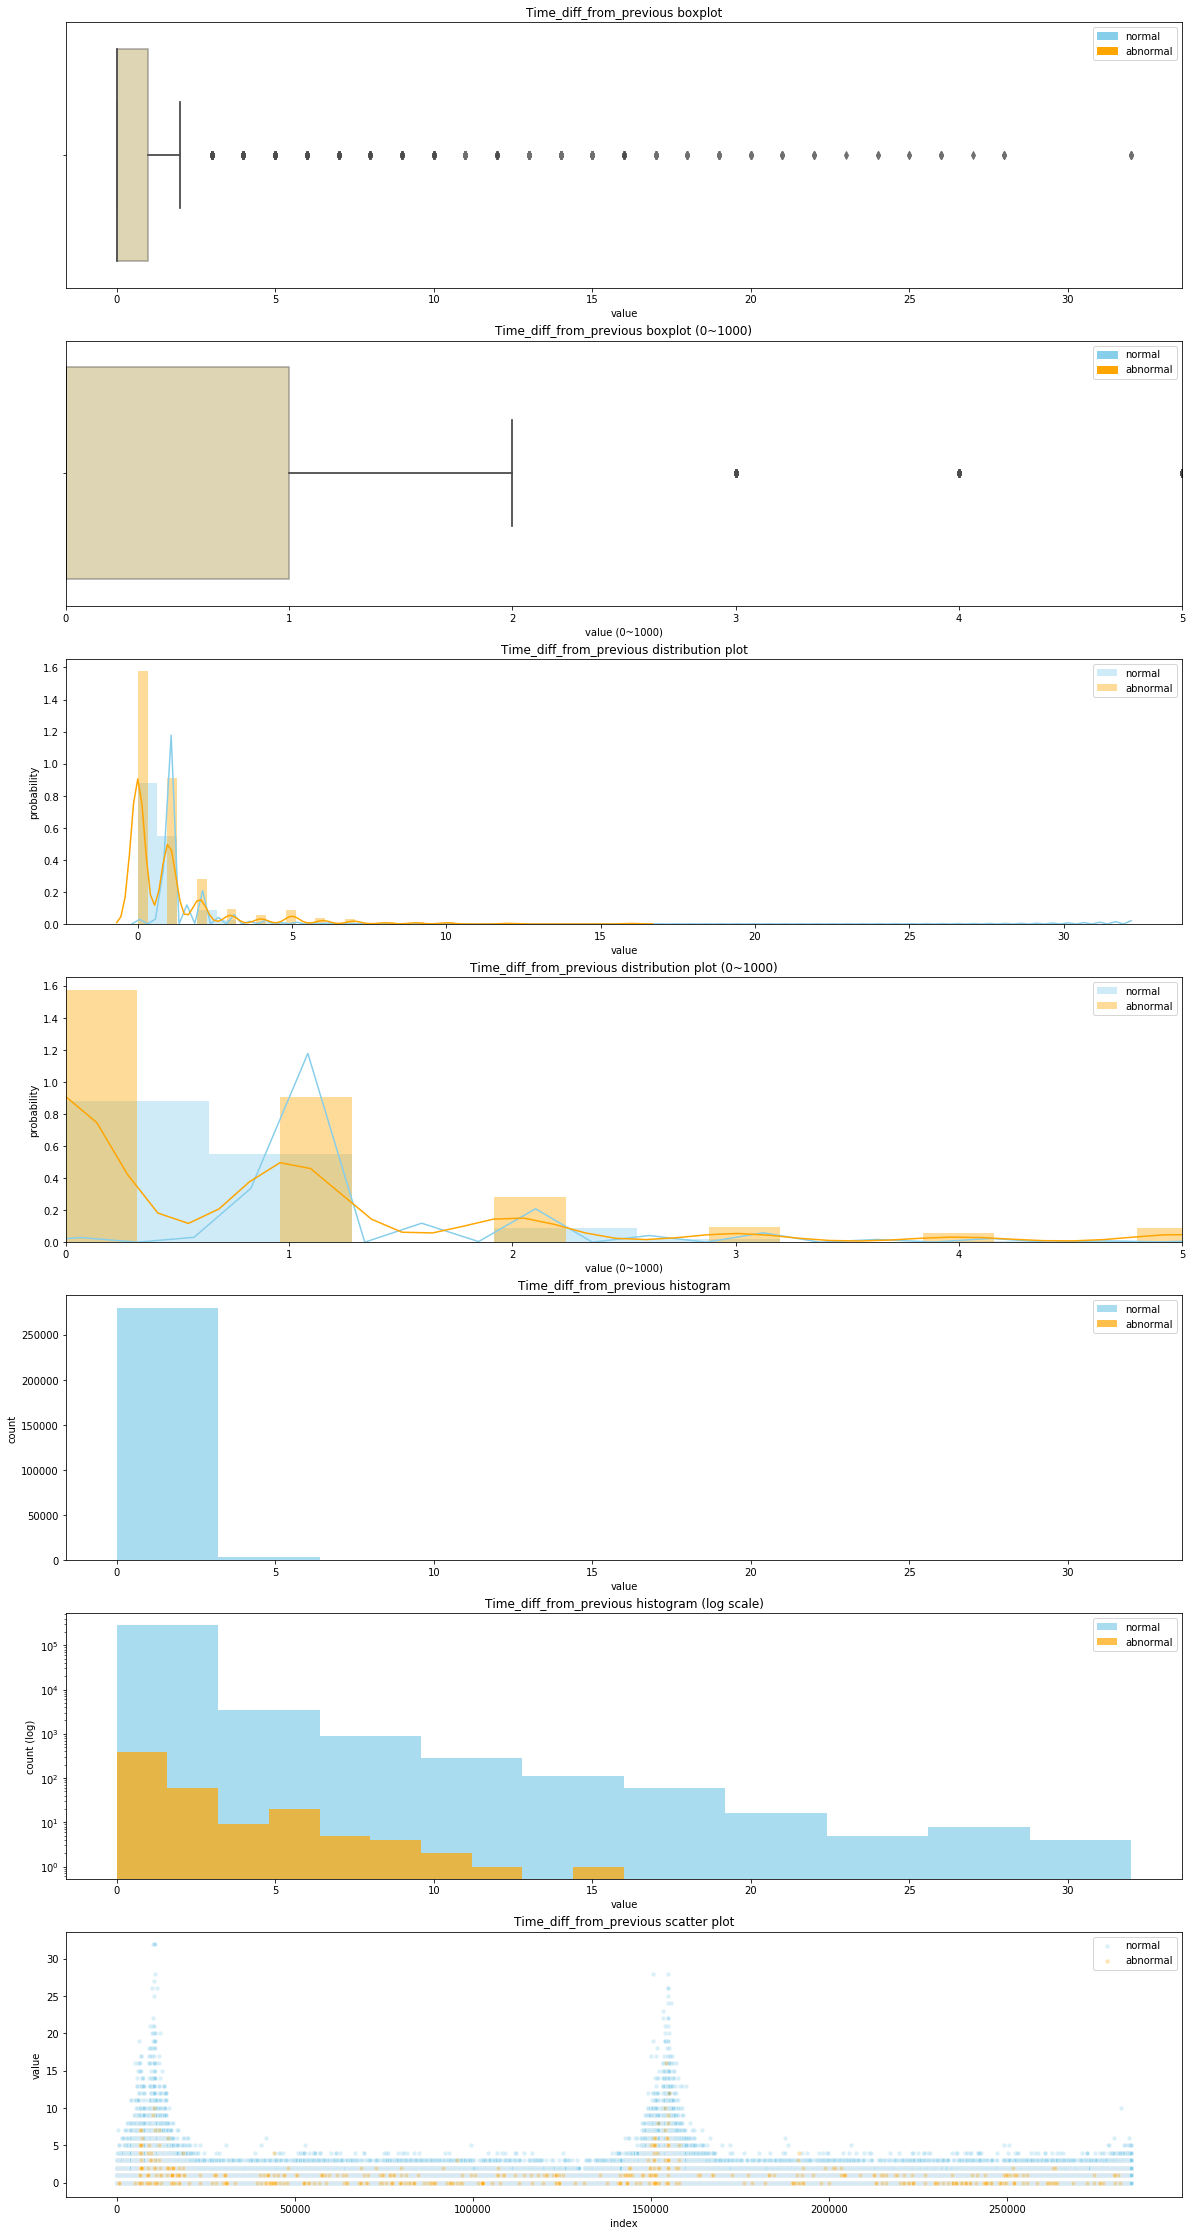

In [26]:
show_deeper('Time_diff_from_previous', 0, 5)

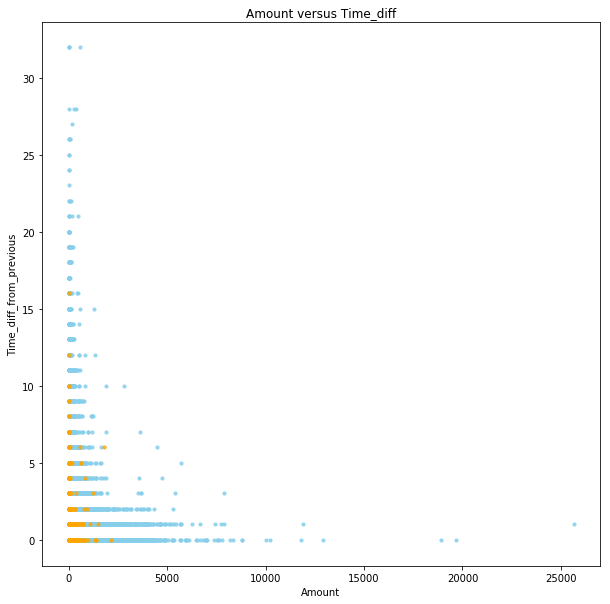

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(df_normal['Amount'], df_normal['Time_diff_from_previous'], color='skyblue', label='normal', alpha=0.8, s=10)
plt.scatter(df_abnormal['Amount'], df_abnormal['Time_diff_from_previous'], color='orange', label='abnormal', alpha=0.8, s=10)
plt.xlabel('Amount')
plt.ylabel('Time_diff_from_previous')
plt.title('Amount versus Time_diff')
plt.show()